# Training Deep Neural Networks

## Vanishing/Exploding Gradient Problems

### Glorot Initialization (when using the logistic function)
Normal distribution with mean 0 and variance $\sigma^2 = \dfrac{1}{fan_{avg}}$

Or a uniform distribution between -r and +r, with $r = \sqrt{\dfrac{3}{fan_{avg}}}$

where, $fan_{avg} = \dfrac{fan_{in} + fan_{out}}{2}$

In [1]:
from tensorflow import keras

2023-06-15 05:49:35.684751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 05:49:36.017909: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2023-06-15 05:49:36.017925: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-15 05:49:37.240517: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object

In [2]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [3]:
he_avg_init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg',
                                                distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=he_avg_init)

#### Leaky ReLU:
$LeakyReLU_{\alpha}(z) = max(\alpha z, z)$

#### ELU activation function
$ELU_{\alpha}(z)= \begin{cases}\alpha (e^z - 1) &\mbox{if } z<0 \\ z &\mbox{if } z\geq 0\end{cases}$

In [4]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
layer = keras.layers.Dense(10, activation=leaky_relu, 
                           kernel_initializer="he_normal")

#### Batch Normalization Algorithm
$\mu_{B} = \dfrac{1}{m_{B}} \sum _{i=1}^{m_{B}} x^{(i)}$

$\sigma_{B}^{2} = \dfrac{1}{m_{B}} \sum _{i=1}^{m_{B}}(x^{(i)} - \mu_{B})$

$\hat{x}^{(i)} = \dfrac{x^{(i)} - \mu_{B}}{\sqrt{\sigma_{B}^{2} + \epsilon}}$

$z^{(i)} = \gamma \otimes \hat{x}^{(i)} + \beta$

$\mu_{B}$ is the vector of input means, evaluated over the whole mini-batch B (it contains one mean per input).

$\sigma_{B}$ is the vector of input standard deviations, also evaluated over the whole mini-batch (it contains one standard deviation per input).

$m_{B}$ is the number of instances in the mini-batch

$\hat{x}^{(i)}$ is the vector of zero-centered and normalized inputs for instance i. 

$\gamma$ is the output scale parameter vector for the layer (it contains one scale parameter per input).

$\otimes$ represents element-wise multiplication (each input is multiplied by its corresponding output scale parameter).

$\beta$ is the output shift (offset) parameter vector for the layer (it contains one offset parameter per input). Each input is offset by its corresponding shift parameter.

$\epsilon$ is a tiny number to avoid division by zero (typically $10^{-5}$). This is called a soothing term.

$z^{(i)}$ is the output of the BN operation: it is a rescaled and shifted version of the inputs.

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='elu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

2023-06-15 05:49:38.898977: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2023-06-15 05:49:38.899194: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-15 05:49:38.899212: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (emanueloliveira-CI581128TBW10): /proc/driver/nvidia/version does not exist
2023-06-15 05:49:38.899918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [7]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

#### Momentum Hyperparameter
$\hat{v} \leftarrow \hat{v} \times momentum + v \times(1 - momentum)$

A good momentum value is typically close to 1—for example, 0.9, 0.99, or 0.999 (you want more 9s for larger datasets and smaller mini-batches).

In [8]:
# Gradient Clipping

optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

optimizer = keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="mse", optimizer=optimizer)

## Reusing Pretrained Layers

In [9]:
# Transfer Learning with Keras

"""
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))
"""

'\nmodel_A = keras.models.load_model("my_model_A.h5")\nmodel_B_on_A = keras.models.Sequential(model_A.layers[:-1])\nmodel_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))\n'

In [10]:
# Avoid affecting model A:

"""
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
"""

'\nmodel_A_clone = keras.models.clone_model(model_A)\nmodel_A_cline.set_weights(model_A.get_weights())\n'

In [11]:
# Avoid wrecking the reused weights:

"""
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd". metrics=["accuracy"])

...

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = keras.optimizers.SGD(lr=1e-4) # the default is 1e-3
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer. metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

"""

'\nfor layer in model_B_on_A.layers[:-1]:\n    layer.trainable = False\nmodel_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd". metrics=["accuracy"])\n\n...\n\nhistory = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))\n\nfor layer in model_B_on_A.layers[:-1]:\n    layer.trainable = True\n\noptimizer = keras.optimizers.SGD(lr=1e-4) # the default is 1e-3\nmodel_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer. metrics=["accuracy"])\nhistory = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))\n\n'

## Faster Optmizers

#### Momentum Algorithm
$m\leftarrow \beta m - \eta \nabla_{\theta}J(\theta)$

$\theta \leftarrow \theta + m$

In [12]:
# Momentum Optimizition
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

#### Nesterov Accelareted Gradient Algorithm
$m\leftarrow \beta m - \eta \nabla_{\theta}J(\theta +\beta m)$

$\theta \leftarrow \theta + m$

In [13]:
# NAG Optimization
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad Algorithm
$s\leftarrow s + \nabla_{\theta}J(\theta)\otimes \nabla_{\theta}J(\theta)$

$\theta \leftarrow \theta - \eta\nabla_{\theta}J(\theta)\oslash\sqrt{s+\epsilon}$

#### RMSProp Algorithm
$s \leftarrow \beta s + (1 - \beta)\nabla_{\theta}J(\theta)\otimes\nabla_{\theta}J(\theta)$

$\theta \leftarrow \theta - \eta\nabla_{\theta}J(\theta)\oslash\sqrt{s+\epsilon}$

In [14]:
# RMSProp Optimizer
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

#### Adam Algorithm
$m\leftarrow \beta_1 m - (1-\beta_1)\nabla_{\theta}J(\theta)$

$s \leftarrow \beta_2s+(1-\beta_2)\nabla_{\theta}J(\theta)\otimes\nabla_{\theta}J(\theta)$

$\hat{m}\leftarrow \dfrac{m}{1-\beta_1^t}$

$\hat{s}\leftarrow \dfrac{s}{1-\beta_2^t}$

$\theta \leftarrow \theta +\eta\hat{m}\oslash\sqrt{\hat{s}+\epsilon}$

In [15]:
# Adam Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### Power Scheduling 
$\eta(t) = \eta_0/(1+t/s)^c$

#### Exponential Scheduling
$\eta(t) = \eta_00.1^{t/s}$

#### Piecewise constant scheduling
Use a constant learning rate for a certain number of epochs

#### Perfomance Scheduling
Measure the validation error every N steps (just like for early stopping) and reduce the learning rate by a facor $\lambda$ when the error stops dropping.

In [16]:
# Power scheduling
optimizer = keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

# Exponential Scheduling
def exponential_decay_fn(epoch):
    return 0.01*0.1**(epoch/20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch/s)
    return exponential_decay_fn

"""
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
# history = model.fit(X_train_scaled, y_train, [...], callbacks=[lr_scheduler])

# Piecewiese constante scheduling 
def piecewise_constant_fn(epoch):
    if epoch <5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

# Perfomance Scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

# Keras Optimizers Schedules
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
"""

'\nexponential_decay_fn = exponential_decay(lr0=0.01, s=20)\nlr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)\n# history = model.fit(X_train_scaled, y_train, [...], callbacks=[lr_scheduler])\n\n# Piecewiese constante scheduling \ndef piecewise_constant_fn(epoch):\n    if epoch <5:\n        return 0.01\n    elif epoch < 15:\n        return 0.005\n    else:\n        return 0.001\n\n# Perfomance Scheduling\nlr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)\n\n# Keras Optimizers Schedules\ns = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)\nlearning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)\noptimizer = keras.optimizers.SGD(learning_rate)\n'

## Avoid Overfitting Through Regularization

In [17]:
# l2 regularization
layer = keras.layers.Dense(100, activation='elu',
                          kernel_initializer='he_normal',
                          kernel_regularizer=keras.regularizers.l2(0.01))

In [18]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                          activation="elu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax", kernel_initializer="glorot_uniform")
])

In [19]:
# Dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax"),
])

In [20]:
# MC Dropout
import numpy as np
"""
with keras.backend.learning_phase_scope(1): # force training mode = dropout on
    y_probas = np.stack([model.predict(X_test_scaled)
                        for sample in range(100)])
y_proba = y_probas.mean(axis=0)
"""

'\nwith keras.backend.learning_phase_scope(1): # force training mode = dropout on\n    y_probas = np.stack([model.predict(X_test_scaled)\n                        for sample in range(100)])\ny_proba = y_probas.mean(axis=0)\n'

In [21]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(input, training=True)

In [22]:
# Max-Norm Regularization
keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", 
                   kernel_constraint=keras.constraints.max_norm(1.))

#### Default DNN configuration
    kernel initializer: LeCun Initialization
    Activation function: SELU
    Normalization: None (self-normalization)
    Optimizer: Nadam
    Learning rate schedule: Performance Scheduling

### Exercises

#### Exercise 1
    No, initializing the weights with the same value will cause them to suffer the same amount of tweek by gradient descente and the network won't be able to priotize the weights with more relevance.

#### Exercise 2
    It's the common acception, but it depends on the activation function, you may want to have some little constant for the bias term, so the activation function (such as ReLU) will produce a first output, and the weights will have an initial gradient.

#### Exercise 3
    In counter part to ReLU, the SELU activation function guarantees that the neurons won't die. It generally learns faster and better then the ReLU and works really well with Batch Normalization.

#### Exercise 4
    SELU when applying Batch Normalization;
    leaky ReLU when you care more about runtime latency.
    ReLU don't use it
    Tanh can also be used for binary classifier, its output from -1 to  1 helps speed up convergence.
    Logistic for simple binary classifiers.
    Softmax for multiclass binary classifiers.

#### Exercise 5
    Since you'll have almost no friction, there's a chance of the optimizer overshooting the minimum many times before stabilizing.

#### Exercise 6
    * Train normally the model, then get rid of the tiny weights (set them to 0)
    * Apply stron l1 regularization during training, as it pushes the optimizer to zero out as many wights as it can
    * Apply Dual Averaging (Folllow The Regularized Leader - FTRL)

#### Exercise 7
    The usual dropout does not slow training, thoght it's using time to "turn off" the neurons, less neurons means lesser runtime execution. But the MC Dropout can slow training since it runs several models to evaluate Monte Carlo.

#### Exercise 8

In [23]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Extracting data
X_data, y_data = load_digits(n_class=5, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (506, 64)
X_test shape: (226, 64)
y_train shape: (506,)
y_test shape: (226,)


In [24]:
# Label binarizer
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)
y_val_lb = lb.fit_transform(y_val)

print(f"y_train shape: {y_train_lb.shape}")
print(f"y_test shape: {y_test_lb.shape}")

y_train shape: (506, 5)
y_test shape: (226, 5)


In [33]:
# Creating the sequential model
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", input_shape=[64,]),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(5, activation="softmax")
])

# Setting compiler functions
optimizer = keras.optimizers.Adam()
earlystopping = keras.callbacks.EarlyStopping(patience=3, min_delta=0.001, restore_best_weights=True)

# Compile the model
model.compile(
    loss="categorical_crossentropy", 
    metrics=["categorical_accuracy"],
    optimizer=optimizer,
)

In [34]:
# Train the model
history = model.fit(
    X_train, y_train_lb,
    validation_data=(X_val, y_val_lb),
    callbacks=[earlystopping],
    epochs=50
)

Epoch 1/50
16/16 [==============================] - 1s 11ms/step - loss: 1.8611 - categorical_accuracy: 0.7036 - val_loss: 0.3673 - val_categorical_accuracy: 0.8935
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1273 - categorical_accuracy: 0.9625 - val_loss: 0.1716 - val_categorical_accuracy: 0.9467
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0314 - categorical_accuracy: 0.9881 - val_loss: 0.0641 - val_categorical_accuracy: 0.9822
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_categorical_accuracy: 0.9822
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0484 - val_categorical_accuracy: 0.9822
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 7.5833e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_categorical_accuracy: 0.9822
Epoch 7/50


In [35]:
model.evaluate(X_test, y_test_lb)[1]

8/8 [==============================] - 0s 1ms/step - loss: 0.0342 - categorical_accuracy: 0.9912


0.991150438785553

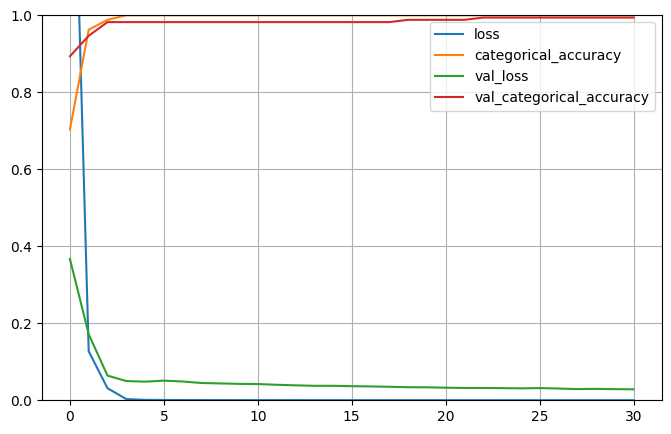

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
# Tuning the hyperparameters

def CreateModel(n_neurons, n_hidden, activation_func, kernel_init, optimizer):
    model = keras.models.Sequential([keras.layers.Dense(n_neurons, activation=activation_func, kernel_initializer=kernel_init, input_shape=[64,])])
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activation_func, kernel_initializer=kernel_init))
    model.add(keras.layers.Dense(5, activation="softmax"))
    
    model.compile(
        loss="categorical_crossentropy",
        metrics=["categorical_accuracy"],
        optimizer=optimizer,
    )
    return model

In [38]:
model = CreateModel(100, 3, "relu", "he_normal", "adam")

In [39]:
neurons_num = [10, 30, 50, 100, 200]
hidden_num = [0, 1, 2, 3]
activation_funcs = ["relu", "elu", "selu"]
kernel_init = ["glorot_normal", "he_normal", "he_uniform", "glorot_uniform"]
optimziers = ["adam", "sgd", "nadam"]

In [40]:
best_accuracy = 0
bestModel = model
modelCont = 0
for neuron in neurons_num:
    for hidden in hidden_num:
        for activation in activation_funcs:
            for kernel in kernel_init:
                for optimizer in optimziers:
                    print(f"CurrentModel: {modelCont}")
                    model = CreateModel(neuron, hidden, activation, kernel, optimizer)
                    model.fit(
                        X_train, y_train_lb,
                        validation_data=(X_val, y_val_lb),
                        callbacks=[earlystopping],
                        epochs=50
                    )
                    accAtual = model.evaluate(X_val, y_val_lb)[1]
                    if(accAtual > best_accuracy):
                        bestModel = model
                    modelCont += 1

CurrentModel: 0
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 4.1137 - categorical_accuracy: 0.2767 - val_loss: 2.8301 - val_categorical_accuracy: 0.2959
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 2.1256 - categorical_accuracy: 0.3636 - val_loss: 1.7015 - val_categorical_accuracy: 0.3373
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.4579 - categorical_accuracy: 0.4585 - val_loss: 1.3728 - val_categorical_accuracy: 0.4970
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1.2425 - categorical_accuracy: 0.5494 - val_loss: 1.2138 - val_categorical_accuracy: 0.5562
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 1.0726 - categorical_accuracy: 0.6087 - val_loss: 1.0601 - val_categorical_accuracy: 0.6331
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9028 - categorical_accuracy: 0.6680 - val_loss: 0.8873 - val_categorical_accuracy: 0.7041


Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8110 - categorical_accuracy: 0.7530 - val_loss: 0.6338 - val_categorical_accuracy: 0.8225
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4698 - categorical_accuracy: 0.8617 - val_loss: 0.3495 - val_categorical_accuracy: 0.8935
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2990 - categorical_accuracy: 0.9190 - val_loss: 0.2564 - val_categorical_accuracy: 0.9053
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2169 - categorical_accuracy: 0.9289 - val_loss: 0.2131 - val_categorical_accuracy: 0.9231
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1701 - categorical_accuracy: 0.9447 - val_loss: 0.2095 - val_categorical_accuracy: 0.9172
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1472 - categorical_accuracy: 0.9466 - val_loss: 0.1660 - val_categorical_accuracy: 0.9408
Epoch 8/50
16/16

16/16 [==============================] - 0s 3ms/step - loss: 0.0919 - categorical_accuracy: 0.9802 - val_loss: 0.1559 - val_categorical_accuracy: 0.9527
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0870 - categorical_accuracy: 0.9802 - val_loss: 0.1488 - val_categorical_accuracy: 0.9645
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0828 - categorical_accuracy: 0.9822 - val_loss: 0.1433 - val_categorical_accuracy: 0.9645
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0788 - categorical_accuracy: 0.9822 - val_loss: 0.1394 - val_categorical_accuracy: 0.9527
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0761 - categorical_accuracy: 0.9822 - val_loss: 0.1359 - val_categorical_accuracy: 0.9704
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0726 - categorical_accuracy: 0.9842 - val_loss: 0.1303 - val_categorical_accuracy: 0.9645
Epoch 31/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0773 - categorical_accuracy: 0.9802 - val_loss: 0.1628 - val_categorical_accuracy: 0.9231
Epoch 24/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0727 - categorical_accuracy: 0.9802 - val_loss: 0.1770 - val_categorical_accuracy: 0.9053
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0704 - categorical_accuracy: 0.9802 - val_loss: 0.1494 - val_categorical_accuracy: 0.9231
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0656 - categorical_accuracy: 0.9822 - val_loss: 0.1456 - val_categorical_accuracy: 0.9290
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0602 - categorical_accuracy: 0.9822 - val_loss: 0.1300 - val_categorical_accuracy: 0.9467
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0590 - categorical_accuracy: 0.9822 - val_loss: 0.1295 - val_categorical_accuracy: 0.9408
Epoch 29/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0889 - categorical_accuracy: 0.9842 - val_loss: 0.1932 - val_categorical_accuracy: 0.9586
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0853 - categorical_accuracy: 0.9862 - val_loss: 0.1969 - val_categorical_accuracy: 0.9527
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0820 - categorical_accuracy: 0.9842 - val_loss: 0.1868 - val_categorical_accuracy: 0.9586
Epoch 44/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0786 - categorical_accuracy: 0.9862 - val_loss: 0.1877 - val_categorical_accuracy: 0.9586
Epoch 45/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0770 - categorical_accuracy: 0.9862 - val_loss: 0.1820 - val_categorical_accuracy: 0.9586
Epoch 46/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0731 - categorical_accuracy: 0.9881 - val_loss: 0.1772 - val_categorical_accuracy: 0.9586
Epoch 47/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0437 - categorical_accuracy: 0.9881 - val_loss: 0.2588 - val_categorical_accuracy: 0.9172
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0407 - categorical_accuracy: 0.9901 - val_loss: 0.2502 - val_categorical_accuracy: 0.9172
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0387 - categorical_accuracy: 0.9901 - val_loss: 0.2489 - val_categorical_accuracy: 0.9172
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0367 - categorical_accuracy: 0.9901 - val_loss: 0.2475 - val_categorical_accuracy: 0.9172
Epoch 43/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0355 - categorical_accuracy: 0.9901 - val_loss: 0.2496 - val_categorical_accuracy: 0.9172
Epoch 44/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0335 - categorical_accuracy: 0.9901 - val_loss: 0.2377 - val_categorical_accuracy: 0.9172
Epoch 45/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0140 - categorical_accuracy: 1.0000 - val_loss: 0.0513 - val_categorical_accuracy: 0.9822
Epoch 38/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0137 - categorical_accuracy: 1.0000 - val_loss: 0.0516 - val_categorical_accuracy: 0.9822
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0129 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_categorical_accuracy: 0.9822
Epoch 40/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0126 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_categorical_accuracy: 0.9822
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0121 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_categorical_accuracy: 0.9763
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0116 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_categorical_accuracy: 0.9763
Epoch 43/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0458 - categorical_accuracy: 0.9842 - val_loss: 0.0834 - val_categorical_accuracy: 0.9763
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0434 - categorical_accuracy: 0.9862 - val_loss: 0.0815 - val_categorical_accuracy: 0.9763
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0417 - categorical_accuracy: 0.9862 - val_loss: 0.0806 - val_categorical_accuracy: 0.9763
Epoch 42/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0388 - categorical_accuracy: 0.9921 - val_loss: 0.0786 - val_categorical_accuracy: 0.9822
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0364 - categorical_accuracy: 0.9941 - val_loss: 0.0773 - val_categorical_accuracy: 0.9822
Epoch 44/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0346 - categorical_accuracy: 0.9921 - val_loss: 0.0766 - val_categorical_accuracy: 0.9822
Epoch 45/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 2.0393 - categorical_accuracy: 0.4407 - val_loss: 2.0489 - val_categorical_accuracy: 0.5385
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 1.5881 - categorical_accuracy: 0.5474 - val_loss: 1.5734 - val_categorical_accuracy: 0.5917
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 1.2410 - categorical_accuracy: 0.6028 - val_loss: 1.2520 - val_categorical_accuracy: 0.6686
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9733 - categorical_accuracy: 0.6700 - val_loss: 0.9795 - val_categorical_accuracy: 0.7337
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7681 - categorical_accuracy: 0.7134 - val_loss: 0.8175 - val_categorical_accuracy: 0.7929
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6352 - categorical_accuracy: 0.7569 - val_loss: 0.7101 - val_categorical_accuracy: 0.7988
Epoch 11/50
16/16 [=======

16/16 [==============================] - 0s 2ms/step - loss: 1.6833 - categorical_accuracy: 0.4150 - val_loss: 1.3965 - val_categorical_accuracy: 0.5089
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.2058 - categorical_accuracy: 0.5632 - val_loss: 1.0980 - val_categorical_accuracy: 0.6805
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9283 - categorical_accuracy: 0.7292 - val_loss: 0.8903 - val_categorical_accuracy: 0.7811
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7497 - categorical_accuracy: 0.7945 - val_loss: 0.7671 - val_categorical_accuracy: 0.7988
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6371 - categorical_accuracy: 0.8202 - val_loss: 0.6719 - val_categorical_accuracy: 0.8166
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5540 - categorical_accuracy: 0.8419 - val_loss: 0.6037 - val_categorical_accuracy: 0.8343
Epoch 9/50
16/16 [=========

16/16 [==============================] - 0s 10ms/step - loss: 2.7406 - categorical_accuracy: 0.3182 - val_loss: 1.3654 - val_categorical_accuracy: 0.5089
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1085 - categorical_accuracy: 0.5415 - val_loss: 0.8687 - val_categorical_accuracy: 0.6686
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6888 - categorical_accuracy: 0.7312 - val_loss: 0.6163 - val_categorical_accuracy: 0.7337
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4738 - categorical_accuracy: 0.8419 - val_loss: 0.4827 - val_categorical_accuracy: 0.8284
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3573 - categorical_accuracy: 0.8874 - val_loss: 0.3752 - val_categorical_accuracy: 0.8639
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2706 - categorical_accuracy: 0.9150 - val_loss: 0.3373 - val_categorical_accuracy: 0.8698
Epoch 7/50
16/16 [========

16/16 [==============================] - 0s 4ms/step - loss: 0.1747 - categorical_accuracy: 0.9545 - val_loss: 0.2858 - val_categorical_accuracy: 0.9112
Epoch 22/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1581 - categorical_accuracy: 0.9565 - val_loss: 0.2690 - val_categorical_accuracy: 0.9231
Epoch 23/50
16/16 [==============================] - 0s 5ms/step - loss: 0.1428 - categorical_accuracy: 0.9664 - val_loss: 0.2504 - val_categorical_accuracy: 0.9112
Epoch 24/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1326 - categorical_accuracy: 0.9664 - val_loss: 0.2352 - val_categorical_accuracy: 0.9231
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1195 - categorical_accuracy: 0.9763 - val_loss: 0.2226 - val_categorical_accuracy: 0.9231
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1089 - categorical_accuracy: 0.9783 - val_loss: 0.2093 - val_categorical_accuracy: 0.9290
Epoch 27/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0328 - categorical_accuracy: 0.9921 - val_loss: 0.0858 - val_categorical_accuracy: 0.9586
Epoch 44/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0314 - categorical_accuracy: 0.9941 - val_loss: 0.0872 - val_categorical_accuracy: 0.9586
Epoch 45/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0299 - categorical_accuracy: 0.9941 - val_loss: 0.0847 - val_categorical_accuracy: 0.9586
Epoch 46/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - categorical_accuracy: 0.9941 - val_loss: 0.0822 - val_categorical_accuracy: 0.9586
Epoch 47/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0280 - categorical_accuracy: 0.9941 - val_loss: 0.0806 - val_categorical_accuracy: 0.9586
Epoch 48/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0261 - categorical_accuracy: 0.9960 - val_loss: 0.0811 - val_categorical_accuracy: 0.9586
Epoch 49/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 1.9857 - categorical_accuracy: 0.3538 - val_loss: 1.8514 - val_categorical_accuracy: 0.3964
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 1.6162 - categorical_accuracy: 0.4644 - val_loss: 1.5660 - val_categorical_accuracy: 0.4793
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3611 - categorical_accuracy: 0.5632 - val_loss: 1.3686 - val_categorical_accuracy: 0.5799
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 1.1745 - categorical_accuracy: 0.6304 - val_loss: 1.2235 - val_categorical_accuracy: 0.6331
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 1.0234 - categorical_accuracy: 0.6640 - val_loss: 1.1024 - val_categorical_accuracy: 0.6686
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9041 - categorical_accuracy: 0.7115 - val_loss: 1.0093 - val_categorical_accuracy: 0.6864
Epoch 11/50
16/16 [=======

16/16 [==============================] - 0s 2ms/step - loss: 0.3649 - categorical_accuracy: 0.8794 - val_loss: 0.6648 - val_categorical_accuracy: 0.8225
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2515 - categorical_accuracy: 0.9170 - val_loss: 0.5141 - val_categorical_accuracy: 0.8521
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1771 - categorical_accuracy: 0.9368 - val_loss: 0.4230 - val_categorical_accuracy: 0.8817
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1486 - categorical_accuracy: 0.9605 - val_loss: 0.3427 - val_categorical_accuracy: 0.8935
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1303 - categorical_accuracy: 0.9526 - val_loss: 0.3633 - val_categorical_accuracy: 0.8935
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0982 - categorical_accuracy: 0.9684 - val_loss: 0.3061 - val_categorical_accuracy: 0.9231
Epoch 9/50
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.1877 - categorical_accuracy: 0.9506 - val_loss: 0.2976 - val_categorical_accuracy: 0.8935
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1774 - categorical_accuracy: 0.9545 - val_loss: 0.2798 - val_categorical_accuracy: 0.8935
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1650 - categorical_accuracy: 0.9644 - val_loss: 0.2622 - val_categorical_accuracy: 0.9053
Epoch 22/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1556 - categorical_accuracy: 0.9664 - val_loss: 0.2519 - val_categorical_accuracy: 0.9112
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1482 - categorical_accuracy: 0.9664 - val_loss: 0.2431 - val_categorical_accuracy: 0.9172
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1398 - categorical_accuracy: 0.9704 - val_loss: 0.2224 - val_categorical_accuracy: 0.9290
Epoch 25/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0823 - categorical_accuracy: 0.9842 - val_loss: 0.1608 - val_categorical_accuracy: 0.9467
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0795 - categorical_accuracy: 0.9842 - val_loss: 0.1575 - val_categorical_accuracy: 0.9527
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0763 - categorical_accuracy: 0.9862 - val_loss: 0.1543 - val_categorical_accuracy: 0.9467
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0721 - categorical_accuracy: 0.9881 - val_loss: 0.1506 - val_categorical_accuracy: 0.9467
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0688 - categorical_accuracy: 0.9901 - val_loss: 0.1459 - val_categorical_accuracy: 0.9467
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0677 - categorical_accuracy: 0.9881 - val_loss: 0.1440 - val_categorical_accuracy: 0.9527
Epoch 36/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0439 - categorical_accuracy: 0.9881 - val_loss: 0.0861 - val_categorical_accuracy: 0.9882
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0423 - categorical_accuracy: 0.9842 - val_loss: 0.0868 - val_categorical_accuracy: 0.9882
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0398 - categorical_accuracy: 0.9842 - val_loss: 0.0843 - val_categorical_accuracy: 0.9882
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0376 - categorical_accuracy: 0.9881 - val_loss: 0.0832 - val_categorical_accuracy: 0.9822
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0361 - categorical_accuracy: 0.9862 - val_loss: 0.0770 - val_categorical_accuracy: 0.9882
Epoch 33/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0337 - categorical_accuracy: 0.9921 - val_loss: 0.0792 - val_categorical_accuracy: 0.9882
Epoch 34/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0720 - categorical_accuracy: 0.9842 - val_loss: 0.1463 - val_categorical_accuracy: 0.9467
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0661 - categorical_accuracy: 0.9862 - val_loss: 0.1398 - val_categorical_accuracy: 0.9527
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0613 - categorical_accuracy: 0.9901 - val_loss: 0.1333 - val_categorical_accuracy: 0.9645
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0568 - categorical_accuracy: 0.9862 - val_loss: 0.1289 - val_categorical_accuracy: 0.9645
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0531 - categorical_accuracy: 0.9901 - val_loss: 0.1200 - val_categorical_accuracy: 0.9645
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0490 - categorical_accuracy: 0.9921 - val_loss: 0.1202 - val_categorical_accuracy: 0.9645
Epoch 32/50
16/16 [===

16/16 [==============================] - 0s 4ms/step - loss: 0.0374 - categorical_accuracy: 0.9960 - val_loss: 0.0825 - val_categorical_accuracy: 0.9822
Epoch 46/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0363 - categorical_accuracy: 0.9960 - val_loss: 0.0811 - val_categorical_accuracy: 0.9822
Epoch 47/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0352 - categorical_accuracy: 0.9960 - val_loss: 0.0803 - val_categorical_accuracy: 0.9822
Epoch 48/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0341 - categorical_accuracy: 0.9960 - val_loss: 0.0794 - val_categorical_accuracy: 0.9763
Epoch 49/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0334 - categorical_accuracy: 0.9960 - val_loss: 0.0771 - val_categorical_accuracy: 0.9822
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0782 - categorical_accuracy: 0.9822
CurrentModel: 39
Epoch 1/50
16/16 [==============================] - 1s 10ms/s

16/16 [==============================] - 0s 3ms/step - loss: 0.9173 - categorical_accuracy: 0.6008 - val_loss: 0.8955 - val_categorical_accuracy: 0.5740
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8431 - categorical_accuracy: 0.6067 - val_loss: 0.8491 - val_categorical_accuracy: 0.5858
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7781 - categorical_accuracy: 0.6206 - val_loss: 0.7962 - val_categorical_accuracy: 0.6154
Epoch 15/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7171 - categorical_accuracy: 0.6877 - val_loss: 0.7465 - val_categorical_accuracy: 0.7396
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6601 - categorical_accuracy: 0.7885 - val_loss: 0.6962 - val_categorical_accuracy: 0.7574
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6081 - categorical_accuracy: 0.7964 - val_loss: 0.6463 - val_categorical_accuracy: 0.7811
Epoch 18/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.8633 - categorical_accuracy: 0.6047 - val_loss: 0.9239 - val_categorical_accuracy: 0.5385
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8000 - categorical_accuracy: 0.6126 - val_loss: 0.8646 - val_categorical_accuracy: 0.5680
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7356 - categorical_accuracy: 0.6324 - val_loss: 0.8313 - val_categorical_accuracy: 0.5207
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6629 - categorical_accuracy: 0.6818 - val_loss: 0.7252 - val_categorical_accuracy: 0.7515
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5735 - categorical_accuracy: 0.8241 - val_loss: 0.6370 - val_categorical_accuracy: 0.7692
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5111 - categorical_accuracy: 0.8300 - val_loss: 0.5751 - val_categorical_accuracy: 0.7633
Epoch 16/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.9056 - categorical_accuracy: 0.6008 - val_loss: 0.8240 - val_categorical_accuracy: 0.6923
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8155 - categorical_accuracy: 0.7095 - val_loss: 0.7413 - val_categorical_accuracy: 0.7278
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7306 - categorical_accuracy: 0.7866 - val_loss: 0.6718 - val_categorical_accuracy: 0.7988
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6442 - categorical_accuracy: 0.8043 - val_loss: 0.5864 - val_categorical_accuracy: 0.8284
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5499 - categorical_accuracy: 0.8419 - val_loss: 0.5112 - val_categorical_accuracy: 0.8402
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4602 - categorical_accuracy: 0.8636 - val_loss: 0.4446 - val_categorical_accuracy: 0.8521
Epoch 14/50
16/16 [====

16/16 [==============================] - 0s 3ms/step - loss: 1.5159 - categorical_accuracy: 0.2668 - val_loss: 1.5541 - val_categorical_accuracy: 0.2781
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3667 - categorical_accuracy: 0.3439 - val_loss: 1.3789 - val_categorical_accuracy: 0.4024
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1793 - categorical_accuracy: 0.4960 - val_loss: 1.1808 - val_categorical_accuracy: 0.5562
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9843 - categorical_accuracy: 0.6344 - val_loss: 1.0947 - val_categorical_accuracy: 0.5976
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8765 - categorical_accuracy: 0.6937 - val_loss: 0.9717 - val_categorical_accuracy: 0.6391
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7885 - categorical_accuracy: 0.7253 - val_loss: 0.8805 - val_categorical_accuracy: 0.6805
Epoch 12/50
16/16 [======

16/16 [==============================] - 0s 2ms/step - loss: 0.4137 - categorical_accuracy: 0.8696 - val_loss: 0.4327 - val_categorical_accuracy: 0.8580
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3360 - categorical_accuracy: 0.9012 - val_loss: 0.3575 - val_categorical_accuracy: 0.8935
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2849 - categorical_accuracy: 0.9229 - val_loss: 0.3303 - val_categorical_accuracy: 0.8935
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2401 - categorical_accuracy: 0.9289 - val_loss: 0.3069 - val_categorical_accuracy: 0.8994
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2103 - categorical_accuracy: 0.9407 - val_loss: 0.2739 - val_categorical_accuracy: 0.9112
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1906 - categorical_accuracy: 0.9427 - val_loss: 0.2568 - val_categorical_accuracy: 0.9172
Epoch 10/50
16/16 [========

16/16 [==============================] - 0s 3ms/step - loss: 0.0618 - categorical_accuracy: 0.9802 - val_loss: 0.1515 - val_categorical_accuracy: 0.9527
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0562 - categorical_accuracy: 0.9862 - val_loss: 0.1476 - val_categorical_accuracy: 0.9527
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0513 - categorical_accuracy: 0.9881 - val_loss: 0.1408 - val_categorical_accuracy: 0.9645
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0476 - categorical_accuracy: 0.9881 - val_loss: 0.1236 - val_categorical_accuracy: 0.9586
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0435 - categorical_accuracy: 0.9921 - val_loss: 0.1206 - val_categorical_accuracy: 0.9586
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0397 - categorical_accuracy: 0.9941 - val_loss: 0.1154 - val_categorical_accuracy: 0.9645
Epoch 32/50
16/16 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.2360 - categorical_accuracy: 0.9053
CurrentModel: 54
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 5.7435 - categorical_accuracy: 0.1798 - val_loss: 3.8157 - val_categorical_accuracy: 0.1834
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 3.4174 - categorical_accuracy: 0.2372 - val_loss: 2.6078 - val_categorical_accuracy: 0.2012
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 2.2881 - categorical_accuracy: 0.2826 - val_loss: 1.8566 - val_categorical_accuracy: 0.3018
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.6289 - categorical_accuracy: 0.3834 - val_loss: 1.4077 - val_categorical_accuracy: 0.4320
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 1.2767 - categorical_accuracy: 0.4921 - val_loss: 1.1690 - val_categorical_accuracy: 0.5030
Epoch 6/50
16/16 [==============================] - 0s 3ms/step -

6/6 [==============================] - 0s 1ms/step - loss: 0.1423 - categorical_accuracy: 0.9586
CurrentModel: 55
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 2.8963 - categorical_accuracy: 0.2925 - val_loss: 1.5918 - val_categorical_accuracy: 0.3314
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3503 - categorical_accuracy: 0.3775 - val_loss: 1.3866 - val_categorical_accuracy: 0.3550
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 1.2078 - categorical_accuracy: 0.4111 - val_loss: 1.2287 - val_categorical_accuracy: 0.3905
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1287 - categorical_accuracy: 0.4289 - val_loss: 1.1766 - val_categorical_accuracy: 0.4083
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 1.0784 - categorical_accuracy: 0.4526 - val_loss: 1.1212 - val_categorical_accuracy: 0.4024
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0688 - categorical_accuracy: 0.9842 - val_loss: 0.1792 - val_categorical_accuracy: 0.9408
Epoch 49/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0664 - categorical_accuracy: 0.9842 - val_loss: 0.1735 - val_categorical_accuracy: 0.9349
Epoch 50/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1826 - categorical_accuracy: 0.9408
CurrentModel: 57
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 1.9826 - categorical_accuracy: 0.2905 - val_loss: 1.6136 - val_categorical_accuracy: 0.3491
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.4210 - categorical_accuracy: 0.4585 - val_loss: 1.2434 - val_categorical_accuracy: 0.5680
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0908 - categorical_accuracy: 0.6146 - val_loss: 0.9813 - val_categorical_accuracy: 0.7337
Epoch 4/50
16/16 [==============================] - 0s 3ms/step 

16/16 [==============================] - 0s 3ms/step - loss: 1.9258 - categorical_accuracy: 0.1660 - val_loss: 1.8159 - val_categorical_accuracy: 0.1538
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 1.6654 - categorical_accuracy: 0.2372 - val_loss: 1.6436 - val_categorical_accuracy: 0.2367
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1.5017 - categorical_accuracy: 0.3478 - val_loss: 1.4652 - val_categorical_accuracy: 0.3314
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3386 - categorical_accuracy: 0.3913 - val_loss: 1.3022 - val_categorical_accuracy: 0.4024
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1861 - categorical_accuracy: 0.4684 - val_loss: 1.1507 - val_categorical_accuracy: 0.5089
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 1.0588 - categorical_accuracy: 0.5277 - val_loss: 1.0369 - val_categorical_accuracy: 0.5799
Epoch 8/50
16/16 [=========

6/6 [==============================] - 0s 1ms/step - loss: 0.0505 - categorical_accuracy: 0.9822
CurrentModel: 61
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 2.1187 - categorical_accuracy: 0.4783 - val_loss: 0.7882 - val_categorical_accuracy: 0.6982
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6322 - categorical_accuracy: 0.7609 - val_loss: 0.4611 - val_categorical_accuracy: 0.8698
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4241 - categorical_accuracy: 0.8755 - val_loss: 0.3783 - val_categorical_accuracy: 0.8935
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3399 - categorical_accuracy: 0.9051 - val_loss: 0.2622 - val_categorical_accuracy: 0.9290
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2643 - categorical_accuracy: 0.9249 - val_loss: 0.2236 - val_categorical_accuracy: 0.9349
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - 

16/16 [==============================] - 0s 2ms/step - loss: 0.1167 - categorical_accuracy: 0.9684 - val_loss: 0.1665 - val_categorical_accuracy: 0.9467
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1087 - categorical_accuracy: 0.9684 - val_loss: 0.1600 - val_categorical_accuracy: 0.9467
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1016 - categorical_accuracy: 0.9684 - val_loss: 0.1554 - val_categorical_accuracy: 0.9527
Epoch 36/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0959 - categorical_accuracy: 0.9723 - val_loss: 0.1497 - val_categorical_accuracy: 0.9527
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0902 - categorical_accuracy: 0.9723 - val_loss: 0.1450 - val_categorical_accuracy: 0.9527
Epoch 38/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0853 - categorical_accuracy: 0.9783 - val_loss: 0.1420 - val_categorical_accuracy: 0.9527
Epoch 39/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.9623 - categorical_accuracy: 0.6285 - val_loss: 0.8224 - val_categorical_accuracy: 0.6805
Epoch 11/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8105 - categorical_accuracy: 0.7154 - val_loss: 0.7255 - val_categorical_accuracy: 0.7337
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7029 - categorical_accuracy: 0.7826 - val_loss: 0.6243 - val_categorical_accuracy: 0.7633
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6053 - categorical_accuracy: 0.8241 - val_loss: 0.5641 - val_categorical_accuracy: 0.7929
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5418 - categorical_accuracy: 0.8419 - val_loss: 0.4992 - val_categorical_accuracy: 0.8225
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4747 - categorical_accuracy: 0.8617 - val_loss: 0.4510 - val_categorical_accuracy: 0.8521
Epoch 16/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.1129 - categorical_accuracy: 0.9625 - val_loss: 0.3181 - val_categorical_accuracy: 0.8994
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1047 - categorical_accuracy: 0.9684 - val_loss: 0.3055 - val_categorical_accuracy: 0.8935
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0994 - categorical_accuracy: 0.9704 - val_loss: 0.2928 - val_categorical_accuracy: 0.8876
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0930 - categorical_accuracy: 0.9743 - val_loss: 0.2806 - val_categorical_accuracy: 0.8935
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0867 - categorical_accuracy: 0.9783 - val_loss: 0.2808 - val_categorical_accuracy: 0.8994
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0811 - categorical_accuracy: 0.9763 - val_loss: 0.2619 - val_categorical_accuracy: 0.9172
Epoch 34/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - categorical_accuracy: 0.9941 - val_loss: 0.0583 - val_categorical_accuracy: 0.9763
Epoch 27/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0539 - categorical_accuracy: 0.9763
CurrentModel: 71
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 7.8164 - categorical_accuracy: 0.2451 - val_loss: 5.1399 - val_categorical_accuracy: 0.3018
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 3.7272 - categorical_accuracy: 0.2984 - val_loss: 2.5881 - val_categorical_accuracy: 0.3905
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 2.1306 - categorical_accuracy: 0.3656 - val_loss: 1.6419 - val_categorical_accuracy: 0.4852
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.4664 - categorical_accuracy: 0.5000 - val_loss: 1.2022 - val_categorical_accuracy: 0.5680
Epoch 5/50
16/16 [==============================] - 0s 3ms/step -

16/16 [==============================] - 0s 3ms/step - loss: 0.5101 - categorical_accuracy: 0.8142 - val_loss: 0.6423 - val_categorical_accuracy: 0.7870
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4379 - categorical_accuracy: 0.8557 - val_loss: 0.6040 - val_categorical_accuracy: 0.8402
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3453 - categorical_accuracy: 0.9012 - val_loss: 0.4839 - val_categorical_accuracy: 0.8521
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2836 - categorical_accuracy: 0.9190 - val_loss: 0.4431 - val_categorical_accuracy: 0.8698
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2368 - categorical_accuracy: 0.9427 - val_loss: 0.3864 - val_categorical_accuracy: 0.8817
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2077 - categorical_accuracy: 0.9526 - val_loss: 0.3690 - val_categorical_accuracy: 0.8935
Epoch 13/50
16/16 [=====

16/16 [==============================] - 0s 3ms/step - loss: 0.2312 - categorical_accuracy: 0.9209 - val_loss: 0.3200 - val_categorical_accuracy: 0.8698
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2202 - categorical_accuracy: 0.9111 - val_loss: 0.3215 - val_categorical_accuracy: 0.8757
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2067 - categorical_accuracy: 0.9269 - val_loss: 0.3081 - val_categorical_accuracy: 0.8876
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1983 - categorical_accuracy: 0.9209 - val_loss: 0.2885 - val_categorical_accuracy: 0.8817
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1837 - categorical_accuracy: 0.9348 - val_loss: 0.2842 - val_categorical_accuracy: 0.8817
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1761 - categorical_accuracy: 0.9348 - val_loss: 0.2841 - val_categorical_accuracy: 0.8935
Epoch 24/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0649 - categorical_accuracy: 0.9842 - val_loss: 0.1281 - val_categorical_accuracy: 0.9527
Epoch 48/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0613 - categorical_accuracy: 0.9842 - val_loss: 0.1175 - val_categorical_accuracy: 0.9586
Epoch 49/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0582 - categorical_accuracy: 0.9862 - val_loss: 0.1176 - val_categorical_accuracy: 0.9586
Epoch 50/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1159 - categorical_accuracy: 0.9527
CurrentModel: 78
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 2.6601 - categorical_accuracy: 0.3676 - val_loss: 2.2336 - val_categorical_accuracy: 0.3254
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.7475 - categorical_accuracy: 0.4328 - val_loss: 1.7100 - val_categorical_accuracy: 0.4438
Epoch 3/50
16/16 [==============================] - 0s 2ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 0.0619 - categorical_accuracy: 0.9802 - val_loss: 0.0862 - val_categorical_accuracy: 0.9822
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0544 - categorical_accuracy: 0.9802 - val_loss: 0.0801 - val_categorical_accuracy: 0.9822
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0502 - categorical_accuracy: 0.9822 - val_loss: 0.0810 - val_categorical_accuracy: 0.9763
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0456 - categorical_accuracy: 0.9822 - val_loss: 0.0748 - val_categorical_accuracy: 0.9822
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0418 - categorical_accuracy: 0.9862 - val_loss: 0.0689 - val_categorical_accuracy: 0.9822
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0377 - categorical_accuracy: 0.9881 - val_loss: 0.0643 - val_categorical_accuracy: 0.9822
Epoch 44/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.1733 - categorical_accuracy: 0.9387 - val_loss: 0.2167 - val_categorical_accuracy: 0.9053
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1616 - categorical_accuracy: 0.9427 - val_loss: 0.1812 - val_categorical_accuracy: 0.9349
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1481 - categorical_accuracy: 0.9565 - val_loss: 0.1793 - val_categorical_accuracy: 0.9231
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1347 - categorical_accuracy: 0.9585 - val_loss: 0.1619 - val_categorical_accuracy: 0.9290
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1223 - categorical_accuracy: 0.9605 - val_loss: 0.1569 - val_categorical_accuracy: 0.9231
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1158 - categorical_accuracy: 0.9644 - val_loss: 0.1485 - val_categorical_accuracy: 0.9349
Epoch 27/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0867 - categorical_accuracy: 0.9723 - val_loss: 0.1961 - val_categorical_accuracy: 0.9231
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0818 - categorical_accuracy: 0.9783 - val_loss: 0.1947 - val_categorical_accuracy: 0.9172
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0760 - categorical_accuracy: 0.9783 - val_loss: 0.1702 - val_categorical_accuracy: 0.9467
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0798 - categorical_accuracy: 0.9783 - val_loss: 0.1654 - val_categorical_accuracy: 0.9467
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0724 - categorical_accuracy: 0.9842 - val_loss: 0.1654 - val_categorical_accuracy: 0.9527
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0680 - categorical_accuracy: 0.9802 - val_loss: 0.1699 - val_categorical_accuracy: 0.9231
Epoch 25/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0611 - categorical_accuracy: 0.9862 - val_loss: 0.1505 - val_categorical_accuracy: 0.9467
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0572 - categorical_accuracy: 0.9881 - val_loss: 0.1448 - val_categorical_accuracy: 0.9467
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0523 - categorical_accuracy: 0.9901 - val_loss: 0.1405 - val_categorical_accuracy: 0.9527
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0488 - categorical_accuracy: 0.9881 - val_loss: 0.1376 - val_categorical_accuracy: 0.9527
Epoch 38/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0456 - categorical_accuracy: 0.9941 - val_loss: 0.1327 - val_categorical_accuracy: 0.9527
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0427 - categorical_accuracy: 0.9941 - val_loss: 0.1306 - val_categorical_accuracy: 0.9527
Epoch 40/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.2790 - categorical_accuracy: 0.9091 - val_loss: 0.3408 - val_categorical_accuracy: 0.8935
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2608 - categorical_accuracy: 0.9170 - val_loss: 0.3277 - val_categorical_accuracy: 0.8935
Epoch 34/50
16/16 [==============================] - 0s 4ms/step - loss: 0.2454 - categorical_accuracy: 0.9190 - val_loss: 0.3128 - val_categorical_accuracy: 0.9053
Epoch 35/50
16/16 [==============================] - 0s 4ms/step - loss: 0.2298 - categorical_accuracy: 0.9229 - val_loss: 0.3017 - val_categorical_accuracy: 0.9112
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2175 - categorical_accuracy: 0.9328 - val_loss: 0.2879 - val_categorical_accuracy: 0.9231
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2041 - categorical_accuracy: 0.9447 - val_loss: 0.2784 - val_categorical_accuracy: 0.9231
Epoch 38/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0408 - categorical_accuracy: 0.9881 - val_loss: 0.0837 - val_categorical_accuracy: 0.9704
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0411 - categorical_accuracy: 0.9881 - val_loss: 0.0778 - val_categorical_accuracy: 0.9822
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0366 - categorical_accuracy: 0.9921 - val_loss: 0.0776 - val_categorical_accuracy: 0.9763
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0330 - categorical_accuracy: 0.9921 - val_loss: 0.0719 - val_categorical_accuracy: 0.9822
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0334 - categorical_accuracy: 0.9921 - val_loss: 0.0765 - val_categorical_accuracy: 0.9763
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0325 - categorical_accuracy: 0.9921 - val_loss: 0.0668 - val_categorical_accuracy: 0.9822
Epoch 36/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.6518 - categorical_accuracy: 0.7352 - val_loss: 0.6741 - val_categorical_accuracy: 0.7219
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5952 - categorical_accuracy: 0.7648 - val_loss: 0.6307 - val_categorical_accuracy: 0.7396
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5374 - categorical_accuracy: 0.8182 - val_loss: 0.5695 - val_categorical_accuracy: 0.7870
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4789 - categorical_accuracy: 0.8419 - val_loss: 0.5211 - val_categorical_accuracy: 0.8402
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4368 - categorical_accuracy: 0.8597 - val_loss: 0.5189 - val_categorical_accuracy: 0.8402
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3994 - categorical_accuracy: 0.8676 - val_loss: 0.5385 - val_categorical_accuracy: 0.7929
Epoch 13/50
16/16 [=====

16/16 [==============================] - 0s 4ms/step - loss: 0.0347 - categorical_accuracy: 0.9921 - val_loss: 0.0873 - val_categorical_accuracy: 0.9704
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0316 - categorical_accuracy: 0.9941 - val_loss: 0.0877 - val_categorical_accuracy: 0.9704
Epoch 42/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0297 - categorical_accuracy: 0.9941 - val_loss: 0.0853 - val_categorical_accuracy: 0.9645
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0273 - categorical_accuracy: 0.9960 - val_loss: 0.0825 - val_categorical_accuracy: 0.9763
Epoch 44/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0264 - categorical_accuracy: 0.9960 - val_loss: 0.0821 - val_categorical_accuracy: 0.9763
Epoch 45/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0242 - categorical_accuracy: 0.9960 - val_loss: 0.0789 - val_categorical_accuracy: 0.9763
Epoch 46/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.3090 - categorical_accuracy: 0.9190 - val_loss: 0.5018 - val_categorical_accuracy: 0.8639
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2749 - categorical_accuracy: 0.9229 - val_loss: 0.4709 - val_categorical_accuracy: 0.8757
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2469 - categorical_accuracy: 0.9407 - val_loss: 0.4528 - val_categorical_accuracy: 0.8876
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2212 - categorical_accuracy: 0.9486 - val_loss: 0.4412 - val_categorical_accuracy: 0.8876
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2050 - categorical_accuracy: 0.9486 - val_loss: 0.4312 - val_categorical_accuracy: 0.9053
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1911 - categorical_accuracy: 0.9506 - val_loss: 0.4251 - val_categorical_accuracy: 0.9112
Epoch 20/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0779 - categorical_accuracy: 0.9862 - val_loss: 0.1992 - val_categorical_accuracy: 0.9231
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0719 - categorical_accuracy: 0.9881 - val_loss: 0.1917 - val_categorical_accuracy: 0.9290
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0661 - categorical_accuracy: 0.9881 - val_loss: 0.1860 - val_categorical_accuracy: 0.9231
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0614 - categorical_accuracy: 0.9881 - val_loss: 0.1822 - val_categorical_accuracy: 0.9290
Epoch 38/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0581 - categorical_accuracy: 0.9881 - val_loss: 0.1756 - val_categorical_accuracy: 0.9467
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0533 - categorical_accuracy: 0.9901 - val_loss: 0.1716 - val_categorical_accuracy: 0.9467
Epoch 40/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 2.5577 - categorical_accuracy: 0.3320 - val_loss: 2.3547 - val_categorical_accuracy: 0.3018
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 2.0272 - categorical_accuracy: 0.4130 - val_loss: 1.9991 - val_categorical_accuracy: 0.4024
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 1.7300 - categorical_accuracy: 0.4723 - val_loss: 1.7657 - val_categorical_accuracy: 0.4615
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 1.5300 - categorical_accuracy: 0.5119 - val_loss: 1.5907 - val_categorical_accuracy: 0.5030
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3722 - categorical_accuracy: 0.5474 - val_loss: 1.4546 - val_categorical_accuracy: 0.5207
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 1.2431 - categorical_accuracy: 0.5731 - val_loss: 1.3281 - val_categorical_accuracy: 0.5385
Epoch 9/50
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 1.7575 - categorical_accuracy: 0.4289 - val_loss: 1.5406 - val_categorical_accuracy: 0.4734
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3099 - categorical_accuracy: 0.5158 - val_loss: 1.1880 - val_categorical_accuracy: 0.5266
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0385 - categorical_accuracy: 0.5949 - val_loss: 0.9824 - val_categorical_accuracy: 0.5976
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8312 - categorical_accuracy: 0.6759 - val_loss: 0.8207 - val_categorical_accuracy: 0.6627
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6967 - categorical_accuracy: 0.7016 - val_loss: 0.7203 - val_categorical_accuracy: 0.6746
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5899 - categorical_accuracy: 0.7490 - val_loss: 0.6190 - val_categorical_accuracy: 0.7929
Epoch 8/50
16/16 [=========

16/16 [==============================] - 0s 4ms/step - loss: 0.0667 - categorical_accuracy: 0.9901 - val_loss: 0.1871 - val_categorical_accuracy: 0.9231
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0607 - categorical_accuracy: 0.9941 - val_loss: 0.1811 - val_categorical_accuracy: 0.9290
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0538 - categorical_accuracy: 0.9941 - val_loss: 0.1750 - val_categorical_accuracy: 0.9290
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0482 - categorical_accuracy: 0.9941 - val_loss: 0.1662 - val_categorical_accuracy: 0.9290
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0437 - categorical_accuracy: 0.9960 - val_loss: 0.1580 - val_categorical_accuracy: 0.9408
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0397 - categorical_accuracy: 0.9960 - val_loss: 0.1535 - val_categorical_accuracy: 0.9408
Epoch 33/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.1227 - categorical_accuracy: 0.9664 - val_loss: 0.2144 - val_categorical_accuracy: 0.9231
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1137 - categorical_accuracy: 0.9684 - val_loss: 0.2057 - val_categorical_accuracy: 0.9231
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1019 - categorical_accuracy: 0.9704 - val_loss: 0.1958 - val_categorical_accuracy: 0.9231
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0938 - categorical_accuracy: 0.9723 - val_loss: 0.1924 - val_categorical_accuracy: 0.9231
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0873 - categorical_accuracy: 0.9783 - val_loss: 0.1944 - val_categorical_accuracy: 0.9231
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0814 - categorical_accuracy: 0.9743 - val_loss: 0.1837 - val_categorical_accuracy: 0.9231
Epoch 24/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0929 - categorical_accuracy: 0.9723 - val_loss: 0.1559 - val_categorical_accuracy: 0.9586
Epoch 24/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0861 - categorical_accuracy: 0.9783 - val_loss: 0.1343 - val_categorical_accuracy: 0.9586
Epoch 25/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1280 - categorical_accuracy: 0.9586
CurrentModel: 113
Epoch 1/50
16/16 [==============================] - 1s 11ms/step - loss: 2.2886 - categorical_accuracy: 0.3004 - val_loss: 1.7636 - val_categorical_accuracy: 0.3432
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3710 - categorical_accuracy: 0.4348 - val_loss: 1.3061 - val_categorical_accuracy: 0.4320
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1560 - categorical_accuracy: 0.4625 - val_loss: 1.1496 - val_categorical_accuracy: 0.4675
Epoch 4/50
16/16 [==============================] - 0s 3ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 0.1566 - categorical_accuracy: 0.9506 - val_loss: 0.2963 - val_categorical_accuracy: 0.8876
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1446 - categorical_accuracy: 0.9506 - val_loss: 0.2501 - val_categorical_accuracy: 0.9290
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1261 - categorical_accuracy: 0.9605 - val_loss: 0.2430 - val_categorical_accuracy: 0.9408
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1097 - categorical_accuracy: 0.9704 - val_loss: 0.2300 - val_categorical_accuracy: 0.9290
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1060 - categorical_accuracy: 0.9664 - val_loss: 0.2808 - val_categorical_accuracy: 0.9172
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1031 - categorical_accuracy: 0.9723 - val_loss: 0.1994 - val_categorical_accuracy: 0.9349
Epoch 19/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.5910 - categorical_accuracy: 0.7332 - val_loss: 0.6331 - val_categorical_accuracy: 0.7337
Epoch 40/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5524 - categorical_accuracy: 0.7549 - val_loss: 0.6047 - val_categorical_accuracy: 0.7396
Epoch 41/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5126 - categorical_accuracy: 0.7806 - val_loss: 0.5927 - val_categorical_accuracy: 0.7337
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4677 - categorical_accuracy: 0.7945 - val_loss: 0.5570 - val_categorical_accuracy: 0.7811
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4254 - categorical_accuracy: 0.8617 - val_loss: 0.5147 - val_categorical_accuracy: 0.8462
Epoch 44/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3859 - categorical_accuracy: 0.8933 - val_loss: 0.4843 - val_categorical_accuracy: 0.8580
Epoch 45/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.6121 - categorical_accuracy: 0.7372 - val_loss: 0.7052 - val_categorical_accuracy: 0.6627
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5410 - categorical_accuracy: 0.7668 - val_loss: 0.6210 - val_categorical_accuracy: 0.6864
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4688 - categorical_accuracy: 0.7964 - val_loss: 0.5436 - val_categorical_accuracy: 0.7219
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3997 - categorical_accuracy: 0.8320 - val_loss: 0.4864 - val_categorical_accuracy: 0.7751
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3410 - categorical_accuracy: 0.9051 - val_loss: 0.4248 - val_categorical_accuracy: 0.8462
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2880 - categorical_accuracy: 0.9308 - val_loss: 0.3778 - val_categorical_accuracy: 0.8521
Epoch 16/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.2917 - categorical_accuracy: 0.9209 - val_loss: 0.3376 - val_categorical_accuracy: 0.9112
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2602 - categorical_accuracy: 0.9249 - val_loss: 0.3209 - val_categorical_accuracy: 0.8994
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2264 - categorical_accuracy: 0.9427 - val_loss: 0.2894 - val_categorical_accuracy: 0.9231
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2161 - categorical_accuracy: 0.9368 - val_loss: 0.2630 - val_categorical_accuracy: 0.9349
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1901 - categorical_accuracy: 0.9486 - val_loss: 0.2348 - val_categorical_accuracy: 0.9408
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1726 - categorical_accuracy: 0.9545 - val_loss: 0.2867 - val_categorical_accuracy: 0.9231
Epoch 15/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0722 - categorical_accuracy: 0.9743 - val_loss: 0.2189 - val_categorical_accuracy: 0.9172
Epoch 39/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0692 - categorical_accuracy: 0.9723 - val_loss: 0.2104 - val_categorical_accuracy: 0.9349
Epoch 40/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0632 - categorical_accuracy: 0.9763 - val_loss: 0.2108 - val_categorical_accuracy: 0.9231
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0599 - categorical_accuracy: 0.9763 - val_loss: 0.2088 - val_categorical_accuracy: 0.9231
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0564 - categorical_accuracy: 0.9842 - val_loss: 0.2029 - val_categorical_accuracy: 0.9349
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0522 - categorical_accuracy: 0.9842 - val_loss: 0.2081 - val_categorical_accuracy: 0.9290
Epoch 44/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.1554 - categorical_accuracy: 0.9625 - val_loss: 0.3708 - val_categorical_accuracy: 0.8876
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1368 - categorical_accuracy: 0.9723 - val_loss: 0.3401 - val_categorical_accuracy: 0.8876
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1212 - categorical_accuracy: 0.9723 - val_loss: 0.3389 - val_categorical_accuracy: 0.8876
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1068 - categorical_accuracy: 0.9881 - val_loss: 0.3174 - val_categorical_accuracy: 0.8876
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0981 - categorical_accuracy: 0.9862 - val_loss: 0.3151 - val_categorical_accuracy: 0.8876
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0895 - categorical_accuracy: 0.9842 - val_loss: 0.3033 - val_categorical_accuracy: 0.9112
Epoch 21/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0624 - categorical_accuracy: 0.9842 - val_loss: 0.2564 - val_categorical_accuracy: 0.9231
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0581 - categorical_accuracy: 0.9842 - val_loss: 0.2533 - val_categorical_accuracy: 0.9290
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0549 - categorical_accuracy: 0.9842 - val_loss: 0.2482 - val_categorical_accuracy: 0.9349
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0522 - categorical_accuracy: 0.9842 - val_loss: 0.2423 - val_categorical_accuracy: 0.9349
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0499 - categorical_accuracy: 0.9842 - val_loss: 0.2392 - val_categorical_accuracy: 0.9290
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0473 - categorical_accuracy: 0.9842 - val_loss: 0.2332 - val_categorical_accuracy: 0.9408
Epoch 44/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.2188 - categorical_accuracy: 0.9427 - val_loss: 0.3003 - val_categorical_accuracy: 0.9053
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1866 - categorical_accuracy: 0.9526 - val_loss: 0.2741 - val_categorical_accuracy: 0.9112
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1632 - categorical_accuracy: 0.9545 - val_loss: 0.2599 - val_categorical_accuracy: 0.9172
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1427 - categorical_accuracy: 0.9625 - val_loss: 0.2431 - val_categorical_accuracy: 0.9172
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1251 - categorical_accuracy: 0.9743 - val_loss: 0.2353 - val_categorical_accuracy: 0.9172
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1120 - categorical_accuracy: 0.9783 - val_loss: 0.2195 - val_categorical_accuracy: 0.9172
Epoch 18/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0590 - categorical_accuracy: 0.9881 - val_loss: 0.1179 - val_categorical_accuracy: 0.9586
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0536 - categorical_accuracy: 0.9901 - val_loss: 0.1173 - val_categorical_accuracy: 0.9527
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0505 - categorical_accuracy: 0.9901 - val_loss: 0.1136 - val_categorical_accuracy: 0.9586
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0466 - categorical_accuracy: 0.9921 - val_loss: 0.1116 - val_categorical_accuracy: 0.9645
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0429 - categorical_accuracy: 0.9921 - val_loss: 0.1441 - val_categorical_accuracy: 0.9467
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0422 - categorical_accuracy: 0.9960 - val_loss: 0.1041 - val_categorical_accuracy: 0.9586
Epoch 28/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.4481 - categorical_accuracy: 0.8775 - val_loss: 0.4879 - val_categorical_accuracy: 0.8402
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4148 - categorical_accuracy: 0.8913 - val_loss: 0.4602 - val_categorical_accuracy: 0.8521
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3850 - categorical_accuracy: 0.9071 - val_loss: 0.4456 - val_categorical_accuracy: 0.8817
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3609 - categorical_accuracy: 0.9111 - val_loss: 0.4228 - val_categorical_accuracy: 0.8935
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3404 - categorical_accuracy: 0.9190 - val_loss: 0.3951 - val_categorical_accuracy: 0.8876
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3139 - categorical_accuracy: 0.9328 - val_loss: 0.3760 - val_categorical_accuracy: 0.9053
Epoch 29/50
16/16 [===

16/16 [==============================] - 1s 9ms/step - loss: 16.8168 - categorical_accuracy: 0.2075 - val_loss: 9.4275 - val_categorical_accuracy: 0.2249
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 5.6795 - categorical_accuracy: 0.2095 - val_loss: 3.9969 - val_categorical_accuracy: 0.1657
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 3.2336 - categorical_accuracy: 0.1719 - val_loss: 2.8646 - val_categorical_accuracy: 0.1716
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 2.4103 - categorical_accuracy: 0.1976 - val_loss: 2.2976 - val_categorical_accuracy: 0.2189
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 1.9786 - categorical_accuracy: 0.2490 - val_loss: 2.0219 - val_categorical_accuracy: 0.3018
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 1.7024 - categorical_accuracy: 0.3221 - val_loss: 1.7543 - val_categorical_accuracy: 0.3491
Epoch 7/50
16/16 [========

6/6 [==============================] - 0s 1ms/step - loss: 0.3179 - categorical_accuracy: 0.8994
CurrentModel: 139
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 1.9581 - categorical_accuracy: 0.3340 - val_loss: 1.6065 - val_categorical_accuracy: 0.3964
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.3318 - categorical_accuracy: 0.4466 - val_loss: 1.3660 - val_categorical_accuracy: 0.5207
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.1331 - categorical_accuracy: 0.5771 - val_loss: 0.9994 - val_categorical_accuracy: 0.6568
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9474 - categorical_accuracy: 0.6482 - val_loss: 0.8494 - val_categorical_accuracy: 0.6864
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7553 - categorical_accuracy: 0.7470 - val_loss: 0.7325 - val_categorical_accuracy: 0.7337
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

6/6 [==============================] - 0s 1ms/step - loss: 0.1112 - categorical_accuracy: 0.9586
CurrentModel: 140
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 28.3551 - categorical_accuracy: 0.1700 - val_loss: 16.6709 - val_categorical_accuracy: 0.1657
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 12.6327 - categorical_accuracy: 0.1838 - val_loss: 7.9348 - val_categorical_accuracy: 0.2071
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 5.3701 - categorical_accuracy: 0.2213 - val_loss: 3.5141 - val_categorical_accuracy: 0.2426
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 2.4460 - categorical_accuracy: 0.3577 - val_loss: 1.9742 - val_categorical_accuracy: 0.3609
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 1.6975 - categorical_accuracy: 0.4704 - val_loss: 1.7269 - val_categorical_accuracy: 0.4615
Epoch 6/50
16/16 [==============================] - 0s 2ms/ste

16/16 [==============================] - 0s 2ms/step - loss: 0.1437 - categorical_accuracy: 0.9466 - val_loss: 0.3930 - val_categorical_accuracy: 0.8698
Epoch 50/50
6/6 [==============================] - 0s 1ms/step - loss: 0.3881 - categorical_accuracy: 0.8817
CurrentModel: 141
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 3.0129 - categorical_accuracy: 0.3953 - val_loss: 1.8681 - val_categorical_accuracy: 0.4911
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.5491 - categorical_accuracy: 0.5415 - val_loss: 1.1712 - val_categorical_accuracy: 0.5917
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0143 - categorical_accuracy: 0.6719 - val_loss: 0.7852 - val_categorical_accuracy: 0.7160
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7157 - categorical_accuracy: 0.7411 - val_loss: 0.6158 - val_categorical_accuracy: 0.7870
Epoch 5/50
16/16 [==============================] - 0s 2ms/step

Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 1.1916 - categorical_accuracy: 0.5573 - val_loss: 1.1727 - val_categorical_accuracy: 0.6627
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9973 - categorical_accuracy: 0.6482 - val_loss: 1.0350 - val_categorical_accuracy: 0.7041
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8551 - categorical_accuracy: 0.7174 - val_loss: 0.9285 - val_categorical_accuracy: 0.7456
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7439 - categorical_accuracy: 0.7727 - val_loss: 0.8385 - val_categorical_accuracy: 0.7870
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6558 - categorical_accuracy: 0.8123 - val_loss: 0.7621 - val_categorical_accuracy: 0.7870
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5735 - categorical_accuracy: 0.8281 - val_loss: 0.6925 - val_categorical_accuracy: 0.8166
Epoch 10/50
16/1

16/16 [==============================] - 0s 2ms/step - loss: 1.3730 - categorical_accuracy: 0.5830 - val_loss: 0.8988 - val_categorical_accuracy: 0.7219
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6494 - categorical_accuracy: 0.7826 - val_loss: 0.5809 - val_categorical_accuracy: 0.8225
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4273 - categorical_accuracy: 0.8577 - val_loss: 0.4733 - val_categorical_accuracy: 0.8462
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3127 - categorical_accuracy: 0.8972 - val_loss: 0.4011 - val_categorical_accuracy: 0.8757
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2324 - categorical_accuracy: 0.9229 - val_loss: 0.3446 - val_categorical_accuracy: 0.9053
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1892 - categorical_accuracy: 0.9486 - val_loss: 0.3034 - val_categorical_accuracy: 0.9172
Epoch 9/50
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.2162 - categorical_accuracy: 0.9209 - val_loss: 0.1695 - val_categorical_accuracy: 0.9527
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1518 - categorical_accuracy: 0.9407 - val_loss: 0.1228 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0991 - categorical_accuracy: 0.9723 - val_loss: 0.1112 - val_categorical_accuracy: 0.9527
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0795 - categorical_accuracy: 0.9743 - val_loss: 0.0923 - val_categorical_accuracy: 0.9645
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0606 - categorical_accuracy: 0.9881 - val_loss: 0.0840 - val_categorical_accuracy: 0.9822
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0536 - categorical_accuracy: 0.9862 - val_loss: 0.0721 - val_categorical_accuracy: 0.9822
Epoch 8/50
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.0154 - categorical_accuracy: 1.0000 - val_loss: 0.0737 - val_categorical_accuracy: 0.9704
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0145 - categorical_accuracy: 1.0000 - val_loss: 0.0714 - val_categorical_accuracy: 0.9763
Epoch 34/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0137 - categorical_accuracy: 1.0000 - val_loss: 0.0698 - val_categorical_accuracy: 0.9763
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0131 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_categorical_accuracy: 0.9763
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0124 - categorical_accuracy: 1.0000 - val_loss: 0.0660 - val_categorical_accuracy: 0.9763
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0118 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_categorical_accuracy: 0.9763
Epoch 38/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0582 - categorical_accuracy: 0.9881 - val_loss: 0.1689 - val_categorical_accuracy: 0.9527
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0544 - categorical_accuracy: 0.9862 - val_loss: 0.1632 - val_categorical_accuracy: 0.9586
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0480 - categorical_accuracy: 0.9881 - val_loss: 0.1465 - val_categorical_accuracy: 0.9586
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0439 - categorical_accuracy: 0.9941 - val_loss: 0.1401 - val_categorical_accuracy: 0.9586
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0408 - categorical_accuracy: 0.9941 - val_loss: 0.1331 - val_categorical_accuracy: 0.9645
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0400 - categorical_accuracy: 0.9921 - val_loss: 0.1306 - val_categorical_accuracy: 0.9645
Epoch 22/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0938 - categorical_accuracy: 0.9822 - val_loss: 0.1824 - val_categorical_accuracy: 0.9467
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0808 - categorical_accuracy: 0.9822 - val_loss: 0.1654 - val_categorical_accuracy: 0.9527
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0719 - categorical_accuracy: 0.9862 - val_loss: 0.1525 - val_categorical_accuracy: 0.9527
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0629 - categorical_accuracy: 0.9862 - val_loss: 0.1443 - val_categorical_accuracy: 0.9467
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0595 - categorical_accuracy: 0.9862 - val_loss: 0.1372 - val_categorical_accuracy: 0.9527
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0526 - categorical_accuracy: 0.9921 - val_loss: 0.1336 - val_categorical_accuracy: 0.9527
Epoch 20/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.1085 - categorical_accuracy: 0.9763 - val_loss: 0.2936 - val_categorical_accuracy: 0.8876
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0955 - categorical_accuracy: 0.9763 - val_loss: 0.2608 - val_categorical_accuracy: 0.8935
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0873 - categorical_accuracy: 0.9802 - val_loss: 0.2439 - val_categorical_accuracy: 0.9053
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0758 - categorical_accuracy: 0.9881 - val_loss: 0.2283 - val_categorical_accuracy: 0.9172
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0682 - categorical_accuracy: 0.9881 - val_loss: 0.2156 - val_categorical_accuracy: 0.9290
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0621 - categorical_accuracy: 0.9901 - val_loss: 0.2049 - val_categorical_accuracy: 0.9231
Epoch 19/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0344 - categorical_accuracy: 0.9960 - val_loss: 0.1245 - val_categorical_accuracy: 0.9467
Epoch 25/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0319 - categorical_accuracy: 0.9960 - val_loss: 0.1182 - val_categorical_accuracy: 0.9467
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0296 - categorical_accuracy: 0.9960 - val_loss: 0.1146 - val_categorical_accuracy: 0.9467
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0270 - categorical_accuracy: 0.9960 - val_loss: 0.1089 - val_categorical_accuracy: 0.9527
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0253 - categorical_accuracy: 0.9960 - val_loss: 0.1092 - val_categorical_accuracy: 0.9527
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0228 - categorical_accuracy: 0.9960 - val_loss: 0.1026 - val_categorical_accuracy: 0.9527
Epoch 30/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0185 - categorical_accuracy: 1.0000 - val_loss: 0.0811 - val_categorical_accuracy: 0.9645
Epoch 24/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0178 - categorical_accuracy: 1.0000 - val_loss: 0.0823 - val_categorical_accuracy: 0.9645
Epoch 25/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0163 - categorical_accuracy: 1.0000 - val_loss: 0.0789 - val_categorical_accuracy: 0.9645
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0157 - categorical_accuracy: 1.0000 - val_loss: 0.0764 - val_categorical_accuracy: 0.9645
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0143 - categorical_accuracy: 1.0000 - val_loss: 0.0761 - val_categorical_accuracy: 0.9645
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0138 - categorical_accuracy: 1.0000 - val_loss: 0.0744 - val_categorical_accuracy: 0.9645
Epoch 29/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0142 - categorical_accuracy: 0.9980 - val_loss: 0.0573 - val_categorical_accuracy: 0.9763
Epoch 35/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0135 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - val_categorical_accuracy: 0.9882
Epoch 36/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0120 - categorical_accuracy: 1.0000 - val_loss: 0.0518 - val_categorical_accuracy: 0.9763
Epoch 37/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0115 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_categorical_accuracy: 0.9822
Epoch 38/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0108 - categorical_accuracy: 1.0000 - val_loss: 0.0480 - val_categorical_accuracy: 0.9882
Epoch 39/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0105 - categorical_accuracy: 1.0000 - val_loss: 0.0438 - val_categorical_accuracy: 0.9882
Epoch 40/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0965 - categorical_accuracy: 0.9723 - val_loss: 0.3241 - val_categorical_accuracy: 0.9112
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0842 - categorical_accuracy: 0.9743 - val_loss: 0.3068 - val_categorical_accuracy: 0.9231
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0754 - categorical_accuracy: 0.9783 - val_loss: 0.2845 - val_categorical_accuracy: 0.9290
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0671 - categorical_accuracy: 0.9822 - val_loss: 0.2704 - val_categorical_accuracy: 0.9290
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0587 - categorical_accuracy: 0.9881 - val_loss: 0.2423 - val_categorical_accuracy: 0.9349
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0521 - categorical_accuracy: 0.9881 - val_loss: 0.2438 - val_categorical_accuracy: 0.9349
Epoch 19/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0766 - categorical_accuracy: 0.9822 - val_loss: 0.1893 - val_categorical_accuracy: 0.9467
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0670 - categorical_accuracy: 0.9822 - val_loss: 0.1797 - val_categorical_accuracy: 0.9527
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0562 - categorical_accuracy: 0.9862 - val_loss: 0.1701 - val_categorical_accuracy: 0.9527
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0497 - categorical_accuracy: 0.9921 - val_loss: 0.1704 - val_categorical_accuracy: 0.9527
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0441 - categorical_accuracy: 0.9881 - val_loss: 0.1743 - val_categorical_accuracy: 0.9527
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0404 - categorical_accuracy: 0.9941 - val_loss: 0.1658 - val_categorical_accuracy: 0.9527
Epoch 18/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0544 - categorical_accuracy: 0.9941 - val_loss: 0.1634 - val_categorical_accuracy: 0.9467
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0506 - categorical_accuracy: 0.9960 - val_loss: 0.1627 - val_categorical_accuracy: 0.9467
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0473 - categorical_accuracy: 0.9960 - val_loss: 0.1447 - val_categorical_accuracy: 0.9527
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0425 - categorical_accuracy: 0.9980 - val_loss: 0.1412 - val_categorical_accuracy: 0.9527
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0399 - categorical_accuracy: 0.9980 - val_loss: 0.1316 - val_categorical_accuracy: 0.9586
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0376 - categorical_accuracy: 0.9980 - val_loss: 0.1277 - val_categorical_accuracy: 0.9586
Epoch 16/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0609 - categorical_accuracy: 0.9763 - val_loss: 0.1522 - val_categorical_accuracy: 0.9408
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0481 - categorical_accuracy: 0.9862 - val_loss: 0.1438 - val_categorical_accuracy: 0.9349
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0434 - categorical_accuracy: 0.9862 - val_loss: 0.1477 - val_categorical_accuracy: 0.9408
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0387 - categorical_accuracy: 0.9862 - val_loss: 0.1324 - val_categorical_accuracy: 0.9467
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0333 - categorical_accuracy: 0.9901 - val_loss: 0.1376 - val_categorical_accuracy: 0.9527
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0310 - categorical_accuracy: 0.9901 - val_loss: 0.1222 - val_categorical_accuracy: 0.9408
Epoch 19/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0470 - categorical_accuracy: 0.9960 - val_loss: 0.0983 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0433 - categorical_accuracy: 0.9960 - val_loss: 0.0939 - val_categorical_accuracy: 0.9763
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0407 - categorical_accuracy: 0.9941 - val_loss: 0.0896 - val_categorical_accuracy: 0.9763
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0379 - categorical_accuracy: 0.9960 - val_loss: 0.0875 - val_categorical_accuracy: 0.9763
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0368 - categorical_accuracy: 0.9960 - val_loss: 0.0851 - val_categorical_accuracy: 0.9763
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0346 - categorical_accuracy: 0.9941 - val_loss: 0.0801 - val_categorical_accuracy: 0.9763
Epoch 23/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.6915 - categorical_accuracy: 0.8103 - val_loss: 0.8556 - val_categorical_accuracy: 0.7751
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5014 - categorical_accuracy: 0.8538 - val_loss: 0.6762 - val_categorical_accuracy: 0.8343
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3769 - categorical_accuracy: 0.8992 - val_loss: 0.5741 - val_categorical_accuracy: 0.8698
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3124 - categorical_accuracy: 0.9170 - val_loss: 0.5025 - val_categorical_accuracy: 0.8876
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2468 - categorical_accuracy: 0.9387 - val_loss: 0.4572 - val_categorical_accuracy: 0.8935
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2076 - categorical_accuracy: 0.9526 - val_loss: 0.4029 - val_categorical_accuracy: 0.9112
Epoch 10/50
16/16 [========

16/16 [==============================] - 0s 2ms/step - loss: 0.4481 - categorical_accuracy: 0.8419 - val_loss: 0.5070 - val_categorical_accuracy: 0.8462
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2491 - categorical_accuracy: 0.9051 - val_loss: 0.3906 - val_categorical_accuracy: 0.8757
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1955 - categorical_accuracy: 0.9289 - val_loss: 0.3213 - val_categorical_accuracy: 0.8876
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1317 - categorical_accuracy: 0.9486 - val_loss: 0.2895 - val_categorical_accuracy: 0.8935
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1112 - categorical_accuracy: 0.9605 - val_loss: 0.2636 - val_categorical_accuracy: 0.9112
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0775 - categorical_accuracy: 0.9783 - val_loss: 0.2997 - val_categorical_accuracy: 0.9112
Epoch 8/50
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0956 - categorical_accuracy: 0.9783 - val_loss: 0.1351 - val_categorical_accuracy: 0.9527
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0846 - categorical_accuracy: 0.9802 - val_loss: 0.1319 - val_categorical_accuracy: 0.9408
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0737 - categorical_accuracy: 0.9842 - val_loss: 0.1160 - val_categorical_accuracy: 0.9527
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0635 - categorical_accuracy: 0.9862 - val_loss: 0.1127 - val_categorical_accuracy: 0.9586
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0586 - categorical_accuracy: 0.9862 - val_loss: 0.1094 - val_categorical_accuracy: 0.9527
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0499 - categorical_accuracy: 0.9921 - val_loss: 0.1074 - val_categorical_accuracy: 0.9527
Epoch 16/50
16/16 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.0821 - categorical_accuracy: 0.9822
CurrentModel: 179
Epoch 1/50
16/16 [==============================] - 1s 8ms/step - loss: 9.3621 - categorical_accuracy: 0.1423 - val_loss: 5.7667 - val_categorical_accuracy: 0.1420
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 4.1080 - categorical_accuracy: 0.2708 - val_loss: 2.8086 - val_categorical_accuracy: 0.3728
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.9675 - categorical_accuracy: 0.4941 - val_loss: 1.6403 - val_categorical_accuracy: 0.6036
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0852 - categorical_accuracy: 0.6838 - val_loss: 1.0848 - val_categorical_accuracy: 0.6982
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6828 - categorical_accuracy: 0.8024 - val_loss: 0.8269 - val_categorical_accuracy: 0.7870
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 2ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0310 - val_categorical_accuracy: 0.9941
Epoch 49/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0300 - val_categorical_accuracy: 0.9941
Epoch 50/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0294 - categorical_accuracy: 0.9941
CurrentModel: 181
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 1.4009 - categorical_accuracy: 0.5435 - val_loss: 0.7102 - val_categorical_accuracy: 0.7692
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5161 - categorical_accuracy: 0.8221 - val_loss: 0.4045 - val_categorical_accuracy: 0.8994
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3403 - categorical_accuracy: 0.8794 - val_loss: 0.2696 - val_categorical_accuracy: 0.9349
Epoch 4/50
16/16 [==============================] - 0s 2ms/step

16/16 [==============================] - 0s 3ms/step - loss: 0.1659 - categorical_accuracy: 0.9466 - val_loss: 0.2942 - val_categorical_accuracy: 0.9172
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1358 - categorical_accuracy: 0.9605 - val_loss: 0.2650 - val_categorical_accuracy: 0.9231
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1140 - categorical_accuracy: 0.9664 - val_loss: 0.2440 - val_categorical_accuracy: 0.9231
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0992 - categorical_accuracy: 0.9743 - val_loss: 0.2261 - val_categorical_accuracy: 0.9349
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0856 - categorical_accuracy: 0.9822 - val_loss: 0.2128 - val_categorical_accuracy: 0.9290
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0751 - categorical_accuracy: 0.9842 - val_loss: 0.1965 - val_categorical_accuracy: 0.9290
Epoch 14/50
16/16 [====

16/16 [==============================] - 1s 9ms/step - loss: 3.5713 - categorical_accuracy: 0.3340 - val_loss: 2.1336 - val_categorical_accuracy: 0.4970
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.4479 - categorical_accuracy: 0.5711 - val_loss: 1.1793 - val_categorical_accuracy: 0.7219
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7422 - categorical_accuracy: 0.7767 - val_loss: 0.7178 - val_categorical_accuracy: 0.7633
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4338 - categorical_accuracy: 0.8419 - val_loss: 0.4921 - val_categorical_accuracy: 0.8047
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2691 - categorical_accuracy: 0.9130 - val_loss: 0.3790 - val_categorical_accuracy: 0.8402
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1886 - categorical_accuracy: 0.9348 - val_loss: 0.2985 - val_categorical_accuracy: 0.8757
Epoch 7/50
16/16 [=========

6/6 [==============================] - 0s 1ms/step - loss: 0.0925 - categorical_accuracy: 0.9763
CurrentModel: 189
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 5.7069 - categorical_accuracy: 0.3281 - val_loss: 3.3275 - val_categorical_accuracy: 0.3846
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.7528 - categorical_accuracy: 0.5237 - val_loss: 1.0025 - val_categorical_accuracy: 0.6805
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6276 - categorical_accuracy: 0.7530 - val_loss: 0.5309 - val_categorical_accuracy: 0.7988
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3454 - categorical_accuracy: 0.8676 - val_loss: 0.3563 - val_categorical_accuracy: 0.8817
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2150 - categorical_accuracy: 0.9091 - val_loss: 0.2783 - val_categorical_accuracy: 0.8994
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 2ms/step - loss: 0.0590 - categorical_accuracy: 0.9921 - val_loss: 0.1444 - val_categorical_accuracy: 0.9645
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0520 - categorical_accuracy: 0.9941 - val_loss: 0.1379 - val_categorical_accuracy: 0.9704
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0458 - categorical_accuracy: 0.9941 - val_loss: 0.1333 - val_categorical_accuracy: 0.9645
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0419 - categorical_accuracy: 0.9941 - val_loss: 0.1284 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0378 - categorical_accuracy: 0.9941 - val_loss: 0.1221 - val_categorical_accuracy: 0.9645
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0345 - categorical_accuracy: 0.9980 - val_loss: 0.1190 - val_categorical_accuracy: 0.9645
Epoch 20/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0325 - categorical_accuracy: 0.9901 - val_loss: 0.0813 - val_categorical_accuracy: 0.9763
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0284 - categorical_accuracy: 0.9960 - val_loss: 0.0789 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0260 - categorical_accuracy: 0.9960 - val_loss: 0.0748 - val_categorical_accuracy: 0.9822
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0243 - categorical_accuracy: 0.9960 - val_loss: 0.0688 - val_categorical_accuracy: 0.9882
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0213 - categorical_accuracy: 0.9980 - val_loss: 0.0642 - val_categorical_accuracy: 0.9882
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - categorical_accuracy: 1.0000 - val_loss: 0.0720 - val_categorical_accuracy: 0.9822
Epoch 22/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0403 - val_categorical_accuracy: 0.9882
Epoch 44/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0390 - val_categorical_accuracy: 0.9882
Epoch 45/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0386 - val_categorical_accuracy: 0.9941
Epoch 46/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0377 - val_categorical_accuracy: 0.9941
Epoch 47/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0384 - val_categorical_accuracy: 0.9941
Epoch 48/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0380 - val_categorical_accuracy: 0.9941
Epoch 49/50
6/6 [=====

16/16 [==============================] - 0s 3ms/step - loss: 0.0171 - categorical_accuracy: 0.9980 - val_loss: 0.0744 - val_categorical_accuracy: 0.9704
Epoch 23/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0152 - categorical_accuracy: 1.0000 - val_loss: 0.0738 - val_categorical_accuracy: 0.9704
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0135 - categorical_accuracy: 1.0000 - val_loss: 0.0706 - val_categorical_accuracy: 0.9704
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0124 - categorical_accuracy: 1.0000 - val_loss: 0.0679 - val_categorical_accuracy: 0.9704
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0112 - categorical_accuracy: 1.0000 - val_loss: 0.0660 - val_categorical_accuracy: 0.9763
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0103 - categorical_accuracy: 1.0000 - val_loss: 0.0647 - val_categorical_accuracy: 0.9763
Epoch 28/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.1847 - categorical_accuracy: 0.9289 - val_loss: 0.1760 - val_categorical_accuracy: 0.9349
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1354 - categorical_accuracy: 0.9545 - val_loss: 0.1383 - val_categorical_accuracy: 0.9467
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1009 - categorical_accuracy: 0.9664 - val_loss: 0.1045 - val_categorical_accuracy: 0.9586
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0845 - categorical_accuracy: 0.9802 - val_loss: 0.0961 - val_categorical_accuracy: 0.9527
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0612 - categorical_accuracy: 0.9842 - val_loss: 0.0751 - val_categorical_accuracy: 0.9704
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0483 - categorical_accuracy: 0.9901 - val_loss: 0.0676 - val_categorical_accuracy: 0.9763
Epoch 11/50
16/16 [=======

16/16 [==============================] - 1s 9ms/step - loss: 6.9936 - categorical_accuracy: 0.2411 - val_loss: 3.0935 - val_categorical_accuracy: 0.3136
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.9490 - categorical_accuracy: 0.4802 - val_loss: 1.0674 - val_categorical_accuracy: 0.6391
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6111 - categorical_accuracy: 0.8004 - val_loss: 0.5635 - val_categorical_accuracy: 0.8521
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2837 - categorical_accuracy: 0.9051 - val_loss: 0.3588 - val_categorical_accuracy: 0.8935
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1823 - categorical_accuracy: 0.9368 - val_loss: 0.2916 - val_categorical_accuracy: 0.8994
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1357 - categorical_accuracy: 0.9605 - val_loss: 0.2488 - val_categorical_accuracy: 0.9112
Epoch 7/50
16/16 [=========

6/6 [==============================] - 0s 1ms/step - loss: 0.0708 - categorical_accuracy: 0.9822
CurrentModel: 205
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 1.3561 - categorical_accuracy: 0.6443 - val_loss: 0.4389 - val_categorical_accuracy: 0.8698
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3231 - categorical_accuracy: 0.8972 - val_loss: 0.2370 - val_categorical_accuracy: 0.9290
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1894 - categorical_accuracy: 0.9289 - val_loss: 0.2176 - val_categorical_accuracy: 0.9231
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1403 - categorical_accuracy: 0.9664 - val_loss: 0.1723 - val_categorical_accuracy: 0.9467
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1115 - categorical_accuracy: 0.9664 - val_loss: 0.1835 - val_categorical_accuracy: 0.9349
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 3ms/step - loss: 0.0047 - categorical_accuracy: 1.0000 - val_loss: 0.0543 - val_categorical_accuracy: 0.9763
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.0530 - val_categorical_accuracy: 0.9763
Epoch 41/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0043 - categorical_accuracy: 1.0000 - val_loss: 0.0524 - val_categorical_accuracy: 0.9763
Epoch 42/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.0524 - val_categorical_accuracy: 0.9763
Epoch 43/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.0496 - val_categorical_accuracy: 0.9763
Epoch 44/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0036 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_categorical_accuracy: 0.9763
Epoch 45/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0498 - categorical_accuracy: 0.9881 - val_loss: 0.3119 - val_categorical_accuracy: 0.8876
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0447 - categorical_accuracy: 0.9901 - val_loss: 0.2881 - val_categorical_accuracy: 0.8876
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0353 - categorical_accuracy: 0.9941 - val_loss: 0.2863 - val_categorical_accuracy: 0.8935
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0302 - categorical_accuracy: 0.9960 - val_loss: 0.2647 - val_categorical_accuracy: 0.9112
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0270 - categorical_accuracy: 0.9941 - val_loss: 0.2493 - val_categorical_accuracy: 0.9112
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0230 - categorical_accuracy: 0.9980 - val_loss: 0.2429 - val_categorical_accuracy: 0.9112
Epoch 20/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0519 - categorical_accuracy: 0.9901 - val_loss: 0.0487 - val_categorical_accuracy: 0.9941
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0433 - categorical_accuracy: 0.9901 - val_loss: 0.0486 - val_categorical_accuracy: 0.9882
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0346 - categorical_accuracy: 0.9980 - val_loss: 0.0396 - val_categorical_accuracy: 0.9941
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0296 - categorical_accuracy: 0.9980 - val_loss: 0.0407 - val_categorical_accuracy: 0.9882
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0243 - categorical_accuracy: 1.0000 - val_loss: 0.0340 - val_categorical_accuracy: 1.0000
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0207 - categorical_accuracy: 1.0000 - val_loss: 0.0336 - val_categorical_accuracy: 0.9941
Epoch 17/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0151 - categorical_accuracy: 0.9980 - val_loss: 0.0470 - val_categorical_accuracy: 0.9822
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0121 - categorical_accuracy: 1.0000 - val_loss: 0.0437 - val_categorical_accuracy: 0.9822
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0102 - categorical_accuracy: 1.0000 - val_loss: 0.0406 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0084 - categorical_accuracy: 1.0000 - val_loss: 0.0333 - val_categorical_accuracy: 0.9882
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0074 - categorical_accuracy: 1.0000 - val_loss: 0.0359 - val_categorical_accuracy: 0.9882
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0066 - categorical_accuracy: 1.0000 - val_loss: 0.0319 - val_categorical_accuracy: 0.9882
Epoch 21/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0075 - categorical_accuracy: 1.0000 - val_loss: 0.0859 - val_categorical_accuracy: 0.9645
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0070 - categorical_accuracy: 1.0000 - val_loss: 0.0835 - val_categorical_accuracy: 0.9645
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_categorical_accuracy: 0.9704
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0060 - categorical_accuracy: 1.0000 - val_loss: 0.0765 - val_categorical_accuracy: 0.9645
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0057 - categorical_accuracy: 1.0000 - val_loss: 0.0769 - val_categorical_accuracy: 0.9704
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0052 - categorical_accuracy: 1.0000 - val_loss: 0.0768 - val_categorical_accuracy: 0.9704
Epoch 31/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.1020 - categorical_accuracy: 0.9723 - val_loss: 0.2407 - val_categorical_accuracy: 0.9112
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0868 - categorical_accuracy: 0.9802 - val_loss: 0.2248 - val_categorical_accuracy: 0.9112
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0762 - categorical_accuracy: 0.9842 - val_loss: 0.2138 - val_categorical_accuracy: 0.9172
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0677 - categorical_accuracy: 0.9842 - val_loss: 0.1987 - val_categorical_accuracy: 0.9172
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0601 - categorical_accuracy: 0.9901 - val_loss: 0.1901 - val_categorical_accuracy: 0.9231
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0535 - categorical_accuracy: 0.9881 - val_loss: 0.1839 - val_categorical_accuracy: 0.9231
Epoch 19/50
16/16 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.1227 - categorical_accuracy: 0.9527
CurrentModel: 225
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 2.0481 - categorical_accuracy: 0.4150 - val_loss: 1.1462 - val_categorical_accuracy: 0.5740
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7684 - categorical_accuracy: 0.7075 - val_loss: 0.5961 - val_categorical_accuracy: 0.7633
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3955 - categorical_accuracy: 0.8755 - val_loss: 0.3344 - val_categorical_accuracy: 0.8935
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2413 - categorical_accuracy: 0.9348 - val_loss: 0.2159 - val_categorical_accuracy: 0.9408
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1524 - categorical_accuracy: 0.9664 - val_loss: 0.1533 - val_categorical_accuracy: 0.9408
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 3ms/step - loss: 0.0173 - categorical_accuracy: 1.0000 - val_loss: 0.0336 - val_categorical_accuracy: 1.0000
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0145 - categorical_accuracy: 1.0000 - val_loss: 0.0345 - val_categorical_accuracy: 0.9882
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0131 - categorical_accuracy: 1.0000 - val_loss: 0.0297 - val_categorical_accuracy: 1.0000
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0114 - categorical_accuracy: 1.0000 - val_loss: 0.0278 - val_categorical_accuracy: 1.0000
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0105 - categorical_accuracy: 1.0000 - val_loss: 0.0259 - val_categorical_accuracy: 1.0000
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0092 - categorical_accuracy: 1.0000 - val_loss: 0.0240 - val_categorical_accuracy: 1.0000
Epoch 24/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - categorical_accuracy: 1.0000 - val_loss: 0.0114 - val_categorical_accuracy: 1.0000
Epoch 38/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0109 - val_categorical_accuracy: 1.0000
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0105 - val_categorical_accuracy: 1.0000
Epoch 40/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0102 - val_categorical_accuracy: 1.0000
Epoch 41/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0109 - categorical_accuracy: 1.0000
CurrentModel: 231
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 4.9093 - categorical_accuracy: 0.2470 - val_loss: 1.8164 - val_categorical_accuracy: 0.4201
Epoch 2/50
16/16 [==============================] - 0s 2ms/st

16/16 [==============================] - 0s 2ms/step - loss: 0.0145 - categorical_accuracy: 1.0000 - val_loss: 0.0614 - val_categorical_accuracy: 0.9941
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0126 - categorical_accuracy: 1.0000 - val_loss: 0.0581 - val_categorical_accuracy: 0.9941
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0110 - categorical_accuracy: 1.0000 - val_loss: 0.0548 - val_categorical_accuracy: 0.9941
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0100 - categorical_accuracy: 1.0000 - val_loss: 0.0521 - val_categorical_accuracy: 0.9941
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0091 - categorical_accuracy: 1.0000 - val_loss: 0.0496 - val_categorical_accuracy: 0.9941
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0081 - categorical_accuracy: 1.0000 - val_loss: 0.0478 - val_categorical_accuracy: 0.9941
Epoch 24/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0348 - categorical_accuracy: 0.9941 - val_loss: 0.2111 - val_categorical_accuracy: 0.9349
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0295 - categorical_accuracy: 0.9960 - val_loss: 0.2067 - val_categorical_accuracy: 0.9349
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0264 - categorical_accuracy: 0.9960 - val_loss: 0.2006 - val_categorical_accuracy: 0.9349
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0227 - categorical_accuracy: 0.9980 - val_loss: 0.1962 - val_categorical_accuracy: 0.9408
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0208 - categorical_accuracy: 0.9980 - val_loss: 0.1911 - val_categorical_accuracy: 0.9408
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0190 - categorical_accuracy: 0.9980 - val_loss: 0.1868 - val_categorical_accuracy: 0.9408
Epoch 19/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0073 - categorical_accuracy: 1.0000 - val_loss: 0.0452 - val_categorical_accuracy: 0.9941
Epoch 37/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0458 - val_categorical_accuracy: 0.9941
Epoch 38/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0444 - val_categorical_accuracy: 0.9941
Epoch 39/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0065 - categorical_accuracy: 1.0000 - val_loss: 0.0438 - val_categorical_accuracy: 0.9941
Epoch 40/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0063 - categorical_accuracy: 1.0000 - val_loss: 0.0432 - val_categorical_accuracy: 0.9941
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0060 - categorical_accuracy: 1.0000 - val_loss: 0.0430 - val_categorical_accuracy: 0.9941
Epoch 42/50
6/6 [=====

16/16 [==============================] - 0s 3ms/step - loss: 0.0192 - categorical_accuracy: 0.9980 - val_loss: 0.0748 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0179 - categorical_accuracy: 0.9980 - val_loss: 0.0725 - val_categorical_accuracy: 0.9704
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0168 - categorical_accuracy: 0.9980 - val_loss: 0.0696 - val_categorical_accuracy: 0.9704
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0157 - categorical_accuracy: 0.9980 - val_loss: 0.0667 - val_categorical_accuracy: 0.9763
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0148 - categorical_accuracy: 0.9980 - val_loss: 0.0640 - val_categorical_accuracy: 0.9763
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0138 - categorical_accuracy: 0.9980 - val_loss: 0.0628 - val_categorical_accuracy: 0.9763
Epoch 23/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0383 - categorical_accuracy: 0.9941 - val_loss: 0.1417 - val_categorical_accuracy: 0.9704
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0331 - categorical_accuracy: 0.9941 - val_loss: 0.1352 - val_categorical_accuracy: 0.9704
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0285 - categorical_accuracy: 0.9960 - val_loss: 0.1316 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - categorical_accuracy: 0.9960 - val_loss: 0.1249 - val_categorical_accuracy: 0.9704
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0221 - categorical_accuracy: 0.9980 - val_loss: 0.1272 - val_categorical_accuracy: 0.9704
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0198 - categorical_accuracy: 0.9980 - val_loss: 0.1179 - val_categorical_accuracy: 0.9704
Epoch 21/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0455 - categorical_accuracy: 0.9901 - val_loss: 0.1426 - val_categorical_accuracy: 0.9408
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0351 - categorical_accuracy: 0.9980 - val_loss: 0.1385 - val_categorical_accuracy: 0.9527
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0300 - categorical_accuracy: 0.9980 - val_loss: 0.1359 - val_categorical_accuracy: 0.9527
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0253 - categorical_accuracy: 0.9980 - val_loss: 0.1268 - val_categorical_accuracy: 0.9527
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0226 - categorical_accuracy: 0.9980 - val_loss: 0.1187 - val_categorical_accuracy: 0.9586
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0195 - categorical_accuracy: 0.9980 - val_loss: 0.1181 - val_categorical_accuracy: 0.9586
Epoch 17/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.0723 - val_categorical_accuracy: 0.9645
Epoch 32/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0035 - categorical_accuracy: 1.0000 - val_loss: 0.0713 - val_categorical_accuracy: 0.9645
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.0702 - val_categorical_accuracy: 0.9645
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0682 - val_categorical_accuracy: 0.9645
Epoch 35/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0676 - val_categorical_accuracy: 0.9704
Epoch 36/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0659 - val_categorical_accuracy: 0.9704
Epoch 37/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.1049 - val_categorical_accuracy: 0.9763
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0039 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_categorical_accuracy: 0.9763
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0036 - categorical_accuracy: 1.0000 - val_loss: 0.1033 - val_categorical_accuracy: 0.9763
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.0991 - val_categorical_accuracy: 0.9763
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0988 - val_categorical_accuracy: 0.9763
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0990 - val_categorical_accuracy: 0.9763
Epoch 31/50
6/6 [=====

16/16 [==============================] - 0s 2ms/step - loss: 1.9329 - categorical_accuracy: 0.4328 - val_loss: 1.2829 - val_categorical_accuracy: 0.5799
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9654 - categorical_accuracy: 0.6897 - val_loss: 0.6989 - val_categorical_accuracy: 0.7692
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5628 - categorical_accuracy: 0.8221 - val_loss: 0.4342 - val_categorical_accuracy: 0.8580
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3417 - categorical_accuracy: 0.8874 - val_loss: 0.2873 - val_categorical_accuracy: 0.8994
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2092 - categorical_accuracy: 0.9447 - val_loss: 0.2106 - val_categorical_accuracy: 0.9290
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1475 - categorical_accuracy: 0.9565 - val_loss: 0.1661 - val_categorical_accuracy: 0.9408
Epoch 8/50
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0089 - categorical_accuracy: 1.0000 - val_loss: 0.0556 - val_categorical_accuracy: 0.9882
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0086 - categorical_accuracy: 1.0000 - val_loss: 0.0530 - val_categorical_accuracy: 0.9882
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0077 - categorical_accuracy: 1.0000 - val_loss: 0.0529 - val_categorical_accuracy: 0.9882
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0071 - categorical_accuracy: 1.0000 - val_loss: 0.0517 - val_categorical_accuracy: 0.9882
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0065 - categorical_accuracy: 1.0000 - val_loss: 0.0489 - val_categorical_accuracy: 0.9882
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0061 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_categorical_accuracy: 0.9882
Epoch 31/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.5693 - categorical_accuracy: 0.8458 - val_loss: 0.4753 - val_categorical_accuracy: 0.8580
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2839 - categorical_accuracy: 0.9387 - val_loss: 0.2370 - val_categorical_accuracy: 0.9290
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1951 - categorical_accuracy: 0.9585 - val_loss: 0.1744 - val_categorical_accuracy: 0.9527
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1247 - categorical_accuracy: 0.9743 - val_loss: 0.1394 - val_categorical_accuracy: 0.9586
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0950 - categorical_accuracy: 0.9842 - val_loss: 0.1155 - val_categorical_accuracy: 0.9704
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0761 - categorical_accuracy: 0.9862 - val_loss: 0.0975 - val_categorical_accuracy: 0.9763
Epoch 8/50
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.1739 - categorical_accuracy: 0.9565 - val_loss: 0.1548 - val_categorical_accuracy: 0.9704
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1245 - categorical_accuracy: 0.9723 - val_loss: 0.1343 - val_categorical_accuracy: 0.9763
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1037 - categorical_accuracy: 0.9802 - val_loss: 0.1345 - val_categorical_accuracy: 0.9527
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0817 - categorical_accuracy: 0.9881 - val_loss: 0.0916 - val_categorical_accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0673 - categorical_accuracy: 0.9921 - val_loss: 0.0833 - val_categorical_accuracy: 0.9763
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0576 - categorical_accuracy: 0.9941 - val_loss: 0.0671 - val_categorical_accuracy: 0.9941
Epoch 11/50
16/16 [=======

Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_categorical_accuracy: 0.9704
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0623 - val_categorical_accuracy: 0.9704
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_categorical_accuracy: 0.9704
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0593 - val_categorical_accuracy: 0.9704
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0582 - val_categorical_accuracy: 0.9704
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0566 - val_categorical_accuracy: 0.9763
Epoch 36/5

Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0359 - val_categorical_accuracy: 0.9882
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0068 - categorical_accuracy: 1.0000 - val_loss: 0.0322 - val_categorical_accuracy: 0.9882
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0065 - categorical_accuracy: 1.0000 - val_loss: 0.0306 - val_categorical_accuracy: 0.9882
Epoch 32/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0061 - categorical_accuracy: 1.0000 - val_loss: 0.0310 - val_categorical_accuracy: 0.9882
Epoch 33/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0058 - categorical_accuracy: 1.0000 - val_loss: 0.0296 - val_categorical_accuracy: 0.9882
Epoch 34/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0306 - categorical_accuracy: 0.9882
CurrentModel: 269
Epoch 1/50
16/16 [==============================

16/16 [==============================] - 0s 2ms/step - loss: 0.0148 - categorical_accuracy: 1.0000 - val_loss: 0.0515 - val_categorical_accuracy: 0.9822
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0127 - categorical_accuracy: 1.0000 - val_loss: 0.0506 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0111 - categorical_accuracy: 1.0000 - val_loss: 0.0498 - val_categorical_accuracy: 0.9822
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0095 - categorical_accuracy: 1.0000 - val_loss: 0.0485 - val_categorical_accuracy: 0.9822
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0084 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_categorical_accuracy: 0.9822
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0074 - categorical_accuracy: 1.0000 - val_loss: 0.0460 - val_categorical_accuracy: 0.9763
Epoch 22/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0518 - val_categorical_accuracy: 0.9822
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - categorical_accuracy: 1.0000 - val_loss: 0.0512 - val_categorical_accuracy: 0.9822
Epoch 26/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0497 - categorical_accuracy: 0.9822
CurrentModel: 276
Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 1.4062 - categorical_accuracy: 0.4960 - val_loss: 0.7508 - val_categorical_accuracy: 0.6982
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4951 - categorical_accuracy: 0.7964 - val_loss: 0.4302 - val_categorical_accuracy: 0.8166
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2705 - categorical_accuracy: 0.9170 - val_loss: 0.3081 - val_categorical_accuracy: 0.8757
Epoch 4/50
16/16 [==============================] - 0s 4ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 0.0212 - categorical_accuracy: 0.9980 - val_loss: 0.1064 - val_categorical_accuracy: 0.9763
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0177 - categorical_accuracy: 0.9980 - val_loss: 0.0974 - val_categorical_accuracy: 0.9822
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0152 - categorical_accuracy: 0.9980 - val_loss: 0.0960 - val_categorical_accuracy: 0.9763
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0132 - categorical_accuracy: 1.0000 - val_loss: 0.0881 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0116 - categorical_accuracy: 1.0000 - val_loss: 0.0851 - val_categorical_accuracy: 0.9822
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0103 - categorical_accuracy: 1.0000 - val_loss: 0.0812 - val_categorical_accuracy: 0.9822
Epoch 20/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.2269 - categorical_accuracy: 0.9447 - val_loss: 0.4152 - val_categorical_accuracy: 0.8876
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1699 - categorical_accuracy: 0.9605 - val_loss: 0.3701 - val_categorical_accuracy: 0.9231
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1357 - categorical_accuracy: 0.9743 - val_loss: 0.3669 - val_categorical_accuracy: 0.9290
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1092 - categorical_accuracy: 0.9763 - val_loss: 0.3144 - val_categorical_accuracy: 0.9290
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0915 - categorical_accuracy: 0.9822 - val_loss: 0.3189 - val_categorical_accuracy: 0.9467
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0749 - categorical_accuracy: 0.9862 - val_loss: 0.2796 - val_categorical_accuracy: 0.9349
Epoch 11/50
16/16 [=======

16/16 [==============================] - 0s 3ms/step - loss: 0.0077 - categorical_accuracy: 1.0000 - val_loss: 0.1286 - val_categorical_accuracy: 0.9586
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0071 - categorical_accuracy: 1.0000 - val_loss: 0.1288 - val_categorical_accuracy: 0.9586
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 0.1256 - val_categorical_accuracy: 0.9645
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0060 - categorical_accuracy: 1.0000 - val_loss: 0.1241 - val_categorical_accuracy: 0.9645
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0055 - categorical_accuracy: 1.0000 - val_loss: 0.1225 - val_categorical_accuracy: 0.9586
Epoch 32/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0052 - categorical_accuracy: 1.0000 - val_loss: 0.1201 - val_categorical_accuracy: 0.9645
Epoch 33/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.1175 - val_categorical_accuracy: 0.9645
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 0.1181 - val_categorical_accuracy: 0.9645
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.1132 - val_categorical_accuracy: 0.9645
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.1181 - val_categorical_accuracy: 0.9645
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.1174 - val_categorical_accuracy: 0.9645
Epoch 27/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1132 - categorical_accuracy: 0.9645
CurrentModel: 288
Epoch 1/50
16/16 [==============================] - 1s 10ms/

16/16 [==============================] - 0s 3ms/step - loss: 0.0244 - categorical_accuracy: 0.9941 - val_loss: 0.0881 - val_categorical_accuracy: 0.9645
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0221 - categorical_accuracy: 0.9941 - val_loss: 0.0866 - val_categorical_accuracy: 0.9645
Epoch 22/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0196 - categorical_accuracy: 0.9941 - val_loss: 0.0788 - val_categorical_accuracy: 0.9704
Epoch 23/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0177 - categorical_accuracy: 0.9960 - val_loss: 0.0750 - val_categorical_accuracy: 0.9704
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0159 - categorical_accuracy: 1.0000 - val_loss: 0.0739 - val_categorical_accuracy: 0.9704
Epoch 25/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0151 - categorical_accuracy: 1.0000 - val_loss: 0.0678 - val_categorical_accuracy: 0.9704
Epoch 26/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.5744 - categorical_accuracy: 0.8281 - val_loss: 0.5192 - val_categorical_accuracy: 0.8757
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3562 - categorical_accuracy: 0.8933 - val_loss: 0.4002 - val_categorical_accuracy: 0.8817
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2609 - categorical_accuracy: 0.9170 - val_loss: 0.3368 - val_categorical_accuracy: 0.9053
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2093 - categorical_accuracy: 0.9368 - val_loss: 0.2893 - val_categorical_accuracy: 0.9349
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1721 - categorical_accuracy: 0.9466 - val_loss: 0.2440 - val_categorical_accuracy: 0.9408
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1444 - categorical_accuracy: 0.9526 - val_loss: 0.2207 - val_categorical_accuracy: 0.9527
Epoch 10/50
16/16 [========

16/16 [==============================] - 0s 2ms/step - loss: 0.0120 - categorical_accuracy: 1.0000 - val_loss: 0.1150 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0115 - categorical_accuracy: 1.0000 - val_loss: 0.1173 - val_categorical_accuracy: 0.9645
Epoch 19/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1147 - categorical_accuracy: 0.9704
CurrentModel: 296
Epoch 1/50
16/16 [==============================] - 1s 8ms/step - loss: 6.5666 - categorical_accuracy: 0.4032 - val_loss: 4.5344 - val_categorical_accuracy: 0.3077
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 2.5749 - categorical_accuracy: 0.4625 - val_loss: 1.8915 - val_categorical_accuracy: 0.4675
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0065 - categorical_accuracy: 0.6858 - val_loss: 0.9202 - val_categorical_accuracy: 0.6923
Epoch 4/50
16/16 [==============================] - 0s 2ms/step

16/16 [==============================] - 0s 2ms/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.0568 - val_categorical_accuracy: 0.9822
Epoch 47/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 0.0557 - val_categorical_accuracy: 0.9822
Epoch 48/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0039 - categorical_accuracy: 1.0000 - val_loss: 0.0572 - val_categorical_accuracy: 0.9822
Epoch 49/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.0542 - val_categorical_accuracy: 0.9822
Epoch 50/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0530 - categorical_accuracy: 0.9822
CurrentModel: 298
Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 1.3553 - categorical_accuracy: 0.7036 - val_loss: 0.6197 - val_categorical_accuracy: 0.7515
Epoch 2/50
16/16 [==============================] - 0s 2ms/st

16/16 [==============================] - 0s 2ms/step - loss: 0.0061 - categorical_accuracy: 1.0000 - val_loss: 0.0433 - val_categorical_accuracy: 0.9763
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - categorical_accuracy: 1.0000 - val_loss: 0.0390 - val_categorical_accuracy: 0.9763
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0054 - categorical_accuracy: 1.0000 - val_loss: 0.0369 - val_categorical_accuracy: 0.9822
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0049 - categorical_accuracy: 1.0000 - val_loss: 0.0396 - val_categorical_accuracy: 0.9822
Epoch 32/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.0352 - val_categorical_accuracy: 0.9822
Epoch 33/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.0351 - val_categorical_accuracy: 0.9822
Epoch 34/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0597 - categorical_accuracy: 0.9881 - val_loss: 0.0895 - val_categorical_accuracy: 0.9645
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0494 - categorical_accuracy: 0.9921 - val_loss: 0.0838 - val_categorical_accuracy: 0.9763
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0441 - categorical_accuracy: 0.9921 - val_loss: 0.0767 - val_categorical_accuracy: 0.9763
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0387 - categorical_accuracy: 0.9941 - val_loss: 0.0732 - val_categorical_accuracy: 0.9704
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0347 - categorical_accuracy: 0.9960 - val_loss: 0.0682 - val_categorical_accuracy: 0.9763
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0322 - categorical_accuracy: 0.9960 - val_loss: 0.0643 - val_categorical_accuracy: 0.9763
Epoch 16/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0036 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_categorical_accuracy: 0.9882
Epoch 42/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.0509 - val_categorical_accuracy: 0.9882
Epoch 43/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.0491 - val_categorical_accuracy: 0.9882
Epoch 44/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0497 - categorical_accuracy: 0.9882
CurrentModel: 306
Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 3.9846 - categorical_accuracy: 0.3300 - val_loss: 1.9767 - val_categorical_accuracy: 0.4556
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.2574 - categorical_accuracy: 0.6601 - val_loss: 0.6058 - val_categorical_accuracy: 0.8521
Epoch 3/50
16/16 [==============================] - 0s 2ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 0.0184 - categorical_accuracy: 0.9980 - val_loss: 0.1066 - val_categorical_accuracy: 0.9645
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0167 - categorical_accuracy: 0.9980 - val_loss: 0.1014 - val_categorical_accuracy: 0.9645
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0153 - categorical_accuracy: 0.9980 - val_loss: 0.0968 - val_categorical_accuracy: 0.9704
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0137 - categorical_accuracy: 0.9980 - val_loss: 0.0884 - val_categorical_accuracy: 0.9704
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0125 - categorical_accuracy: 0.9980 - val_loss: 0.0858 - val_categorical_accuracy: 0.9704
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0116 - categorical_accuracy: 0.9980 - val_loss: 0.0859 - val_categorical_accuracy: 0.9704
Epoch 29/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0394 - val_categorical_accuracy: 0.9882
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 0.0382 - val_categorical_accuracy: 0.9882
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0059 - categorical_accuracy: 1.0000 - val_loss: 0.0368 - val_categorical_accuracy: 0.9882
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_categorical_accuracy: 0.9882
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0051 - categorical_accuracy: 1.0000 - val_loss: 0.0348 - val_categorical_accuracy: 0.9882
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0047 - categorical_accuracy: 1.0000 - val_loss: 0.0348 - val_categorical_accuracy: 0.9882
Epoch 28/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0055 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_categorical_accuracy: 0.9645
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0054 - categorical_accuracy: 1.0000 - val_loss: 0.1115 - val_categorical_accuracy: 0.9645
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0050 - categorical_accuracy: 1.0000 - val_loss: 0.1063 - val_categorical_accuracy: 0.9704
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.1090 - val_categorical_accuracy: 0.9645
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.1088 - val_categorical_accuracy: 0.9645
Epoch 32/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0043 - categorical_accuracy: 1.0000 - val_loss: 0.1036 - val_categorical_accuracy: 0.9704
Epoch 33/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0890 - categorical_accuracy: 0.9704 - val_loss: 0.2398 - val_categorical_accuracy: 0.9349
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0692 - categorical_accuracy: 0.9743 - val_loss: 0.2383 - val_categorical_accuracy: 0.9349
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0548 - categorical_accuracy: 0.9822 - val_loss: 0.2029 - val_categorical_accuracy: 0.9408
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0450 - categorical_accuracy: 0.9842 - val_loss: 0.2108 - val_categorical_accuracy: 0.9408
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0354 - categorical_accuracy: 0.9881 - val_loss: 0.1980 - val_categorical_accuracy: 0.9408
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0310 - categorical_accuracy: 0.9901 - val_loss: 0.1936 - val_categorical_accuracy: 0.9408
Epoch 16/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0175 - categorical_accuracy: 0.9960 - val_loss: 0.0962 - val_categorical_accuracy: 0.9763
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0150 - categorical_accuracy: 0.9960 - val_loss: 0.0931 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0123 - categorical_accuracy: 1.0000 - val_loss: 0.0916 - val_categorical_accuracy: 0.9704
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0114 - categorical_accuracy: 0.9980 - val_loss: 0.0892 - val_categorical_accuracy: 0.9763
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0121 - categorical_accuracy: 0.9980 - val_loss: 0.0816 - val_categorical_accuracy: 0.9763
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0097 - categorical_accuracy: 1.0000 - val_loss: 0.0833 - val_categorical_accuracy: 0.9763
Epoch 22/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0111 - categorical_accuracy: 1.0000 - val_loss: 0.0544 - val_categorical_accuracy: 0.9763
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0101 - categorical_accuracy: 1.0000 - val_loss: 0.0523 - val_categorical_accuracy: 0.9763
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0090 - categorical_accuracy: 1.0000 - val_loss: 0.0495 - val_categorical_accuracy: 0.9822
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0084 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_categorical_accuracy: 0.9822
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0082 - categorical_accuracy: 1.0000 - val_loss: 0.0462 - val_categorical_accuracy: 0.9822
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0076 - categorical_accuracy: 1.0000 - val_loss: 0.0405 - val_categorical_accuracy: 0.9822
Epoch 24/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0079 - categorical_accuracy: 1.0000 - val_loss: 0.0630 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0068 - categorical_accuracy: 1.0000 - val_loss: 0.0572 - val_categorical_accuracy: 0.9704
Epoch 19/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0569 - categorical_accuracy: 0.9763
CurrentModel: 325
Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 1.5455 - categorical_accuracy: 0.6640 - val_loss: 0.3597 - val_categorical_accuracy: 0.8876
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2269 - categorical_accuracy: 0.9308 - val_loss: 0.2435 - val_categorical_accuracy: 0.9231
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1400 - categorical_accuracy: 0.9625 - val_loss: 0.1771 - val_categorical_accuracy: 0.9349
Epoch 4/50
16/16 [==============================] - 0s 2ms/step

16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0398 - val_categorical_accuracy: 0.9822
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0390 - val_categorical_accuracy: 0.9822
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0386 - val_categorical_accuracy: 0.9822
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0378 - val_categorical_accuracy: 0.9822
Epoch 33/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.0375 - val_categorical_accuracy: 0.9822
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - categorical_accuracy: 1.0000 - val_loss: 0.0371 - val_categorical_accuracy: 0.9822
Epoch 35/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0169 - categorical_accuracy: 1.0000 - val_loss: 0.0802 - val_categorical_accuracy: 0.9763
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0151 - categorical_accuracy: 1.0000 - val_loss: 0.0798 - val_categorical_accuracy: 0.9704
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0140 - categorical_accuracy: 1.0000 - val_loss: 0.0797 - val_categorical_accuracy: 0.9704
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0127 - categorical_accuracy: 1.0000 - val_loss: 0.0743 - val_categorical_accuracy: 0.9822
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0118 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0108 - categorical_accuracy: 1.0000 - val_loss: 0.0692 - val_categorical_accuracy: 0.9763
Epoch 19/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0261 - val_categorical_accuracy: 0.9941
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0257 - val_categorical_accuracy: 0.9941
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0252 - val_categorical_accuracy: 0.9941
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 9.8693e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0248 - val_categorical_accuracy: 0.9941
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 9.6090e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0248 - val_categorical_accuracy: 0.9941
Epoch 44/50
16/16 [==============================] - 0s 3ms/step - loss: 9.0081e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0237 - val_categorical_accuracy: 0.9941
Epoch 45/5

16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0213 - val_categorical_accuracy: 0.9882
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0209 - val_categorical_accuracy: 0.9882
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0204 - val_categorical_accuracy: 0.9882
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0191 - val_categorical_accuracy: 0.9882
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0188 - val_categorical_accuracy: 0.9882
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0181 - val_categorical_accuracy: 0.9882
Epoch 30/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0124 - categorical_accuracy: 1.0000 - val_loss: 0.0680 - val_categorical_accuracy: 0.9763
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0114 - categorical_accuracy: 1.0000 - val_loss: 0.0612 - val_categorical_accuracy: 0.9822
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0102 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_categorical_accuracy: 0.9822
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0093 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_categorical_accuracy: 0.9822
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0085 - categorical_accuracy: 1.0000 - val_loss: 0.0571 - val_categorical_accuracy: 0.9822
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0079 - categorical_accuracy: 1.0000 - val_loss: 0.0592 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0723 - val_categorical_accuracy: 0.9882
Epoch 45/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0707 - val_categorical_accuracy: 0.9882
Epoch 46/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0714 - val_categorical_accuracy: 0.9882
Epoch 47/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0703 - val_categorical_accuracy: 0.9882
Epoch 48/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0694 - val_categorical_accuracy: 0.9882
Epoch 49/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0688 - val_categorical_accuracy: 0.9882
Epoch 50/50
6/6 [=====

16/16 [==============================] - 0s 3ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0222 - val_categorical_accuracy: 0.9941
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0215 - val_categorical_accuracy: 1.0000
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0205 - val_categorical_accuracy: 1.0000
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0204 - val_categorical_accuracy: 1.0000
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0199 - val_categorical_accuracy: 1.0000
Epoch 37/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0195 - val_categorical_accuracy: 1.0000
Epoch 38/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.1103 - categorical_accuracy: 0.9565 - val_loss: 0.1566 - val_categorical_accuracy: 0.9645
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0685 - categorical_accuracy: 0.9763 - val_loss: 0.1349 - val_categorical_accuracy: 0.9586
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0468 - categorical_accuracy: 0.9921 - val_loss: 0.1200 - val_categorical_accuracy: 0.9527
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0339 - categorical_accuracy: 0.9960 - val_loss: 0.1103 - val_categorical_accuracy: 0.9645
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0247 - categorical_accuracy: 0.9980 - val_loss: 0.1059 - val_categorical_accuracy: 0.9586
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0196 - categorical_accuracy: 0.9980 - val_loss: 0.0989 - val_categorical_accuracy: 0.9645
Epoch 10/50
16/16 [========

16/16 [==============================] - 0s 2ms/step - loss: 0.0112 - categorical_accuracy: 1.0000 - val_loss: 0.0671 - val_categorical_accuracy: 0.9763
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0100 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_categorical_accuracy: 0.9763
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0092 - categorical_accuracy: 1.0000 - val_loss: 0.0620 - val_categorical_accuracy: 0.9763
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0083 - categorical_accuracy: 1.0000 - val_loss: 0.0584 - val_categorical_accuracy: 0.9763
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0074 - categorical_accuracy: 1.0000 - val_loss: 0.0575 - val_categorical_accuracy: 0.9822
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0568 - val_categorical_accuracy: 0.9822
Epoch 22/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0050 - categorical_accuracy: 1.0000 - val_loss: 0.0542 - val_categorical_accuracy: 0.9763
Epoch 24/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0534 - categorical_accuracy: 0.9763
CurrentModel: 353
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 5.4638 - categorical_accuracy: 0.3775 - val_loss: 2.2493 - val_categorical_accuracy: 0.5444
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.1154 - categorical_accuracy: 0.7372 - val_loss: 0.4961 - val_categorical_accuracy: 0.8284
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3730 - categorical_accuracy: 0.8893 - val_loss: 0.2258 - val_categorical_accuracy: 0.9290
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1750 - categorical_accuracy: 0.9427 - val_loss: 0.1460 - val_categorical_accuracy: 0.9645
Epoch 5/50
16/16 [==============================] - 0s 2ms/step 

Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1612 - categorical_accuracy: 0.9387 - val_loss: 0.2779 - val_categorical_accuracy: 0.9053
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0983 - categorical_accuracy: 0.9565 - val_loss: 0.2250 - val_categorical_accuracy: 0.9349
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0665 - categorical_accuracy: 0.9763 - val_loss: 0.1726 - val_categorical_accuracy: 0.9704
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0484 - categorical_accuracy: 0.9901 - val_loss: 0.1669 - val_categorical_accuracy: 0.9586
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0350 - categorical_accuracy: 0.9921 - val_loss: 0.1472 - val_categorical_accuracy: 0.9763
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0266 - categorical_accuracy: 0.9941 - val_loss: 0.1379 - val_categorical_accuracy: 0.9763
Epoch 11/50
16/

Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1630 - categorical_accuracy: 0.9466 - val_loss: 0.1715 - val_categorical_accuracy: 0.9527
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1078 - categorical_accuracy: 0.9723 - val_loss: 0.1426 - val_categorical_accuracy: 0.9645
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0798 - categorical_accuracy: 0.9802 - val_loss: 0.1115 - val_categorical_accuracy: 0.9704
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0627 - categorical_accuracy: 0.9881 - val_loss: 0.0993 - val_categorical_accuracy: 0.9704
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0511 - categorical_accuracy: 0.9901 - val_loss: 0.0809 - val_categorical_accuracy: 0.9704
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0423 - categorical_accuracy: 0.9921 - val_loss: 0.0612 - val_categorical_accuracy: 0.9763
Epoch 10/50
16/1

16/16 [==============================] - 0s 2ms/step - loss: 0.0075 - categorical_accuracy: 1.0000 - val_loss: 0.0507 - val_categorical_accuracy: 0.9822
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0487 - val_categorical_accuracy: 0.9822
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0065 - categorical_accuracy: 1.0000 - val_loss: 0.0492 - val_categorical_accuracy: 0.9822
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0062 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_categorical_accuracy: 0.9882
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0058 - categorical_accuracy: 1.0000 - val_loss: 0.0443 - val_categorical_accuracy: 0.9882
Epoch 23/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - categorical_accuracy: 1.0000 - val_loss: 0.0429 - val_categorical_accuracy: 0.9882
Epoch 24/50
16/16 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.0512 - categorical_accuracy: 0.9941
CurrentModel: 362
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 2.2178 - categorical_accuracy: 0.3953 - val_loss: 0.6617 - val_categorical_accuracy: 0.7456
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4007 - categorical_accuracy: 0.8755 - val_loss: 0.3127 - val_categorical_accuracy: 0.8757
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1770 - categorical_accuracy: 0.9368 - val_loss: 0.1638 - val_categorical_accuracy: 0.9290
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0986 - categorical_accuracy: 0.9704 - val_loss: 0.1085 - val_categorical_accuracy: 0.9586
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0581 - categorical_accuracy: 0.9901 - val_loss: 0.0870 - val_categorical_accuracy: 0.9704
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 3ms/step - loss: 0.0682 - categorical_accuracy: 0.9842 - val_loss: 0.1896 - val_categorical_accuracy: 0.9408
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0494 - categorical_accuracy: 0.9881 - val_loss: 0.1631 - val_categorical_accuracy: 0.9408
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0351 - categorical_accuracy: 0.9941 - val_loss: 0.1457 - val_categorical_accuracy: 0.9467
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0272 - categorical_accuracy: 0.9941 - val_loss: 0.1347 - val_categorical_accuracy: 0.9467
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0217 - categorical_accuracy: 0.9960 - val_loss: 0.1230 - val_categorical_accuracy: 0.9527
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0158 - categorical_accuracy: 0.9980 - val_loss: 0.1111 - val_categorical_accuracy: 0.9527
Epoch 12/50
16/16 [======

Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1160 - categorical_accuracy: 0.9585 - val_loss: 0.3324 - val_categorical_accuracy: 0.9053
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0740 - categorical_accuracy: 0.9802 - val_loss: 0.3008 - val_categorical_accuracy: 0.9112
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0529 - categorical_accuracy: 0.9862 - val_loss: 0.2990 - val_categorical_accuracy: 0.9112
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0391 - categorical_accuracy: 0.9941 - val_loss: 0.2838 - val_categorical_accuracy: 0.9231
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0312 - categorical_accuracy: 0.9980 - val_loss: 0.2738 - val_categorical_accuracy: 0.9231
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0251 - categorical_accuracy: 1.0000 - val_loss: 0.2732 - val_categorical_accuracy: 0.9231
Epoch 11/50
16/

16/16 [==============================] - 0s 2ms/step - loss: 0.0891 - categorical_accuracy: 0.9842 - val_loss: 0.1582 - val_categorical_accuracy: 0.9349
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0821 - categorical_accuracy: 0.9802 - val_loss: 0.1292 - val_categorical_accuracy: 0.9586
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0687 - categorical_accuracy: 0.9921 - val_loss: 0.1083 - val_categorical_accuracy: 0.9645
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0541 - categorical_accuracy: 0.9901 - val_loss: 0.0975 - val_categorical_accuracy: 0.9763
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0500 - categorical_accuracy: 0.9881 - val_loss: 0.0895 - val_categorical_accuracy: 0.9822
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0437 - categorical_accuracy: 0.9941 - val_loss: 0.0897 - val_categorical_accuracy: 0.9763
Epoch 11/50
16/16 [=======

16/16 [==============================] - 0s 3ms/step - loss: 0.0318 - categorical_accuracy: 0.9960 - val_loss: 0.1070 - val_categorical_accuracy: 0.9704
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0270 - categorical_accuracy: 0.9980 - val_loss: 0.0988 - val_categorical_accuracy: 0.9704
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0242 - categorical_accuracy: 0.9980 - val_loss: 0.1028 - val_categorical_accuracy: 0.9704
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0222 - categorical_accuracy: 0.9980 - val_loss: 0.0924 - val_categorical_accuracy: 0.9704
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0203 - categorical_accuracy: 0.9980 - val_loss: 0.0840 - val_categorical_accuracy: 0.9763
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0183 - categorical_accuracy: 0.9980 - val_loss: 0.0799 - val_categorical_accuracy: 0.9763
Epoch 16/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.1401 - val_categorical_accuracy: 0.9645
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.1397 - val_categorical_accuracy: 0.9645
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.1374 - val_categorical_accuracy: 0.9645
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.1355 - val_categorical_accuracy: 0.9704
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.1363 - val_categorical_accuracy: 0.9645
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.1339 - val_categorical_accuracy: 0.9704
Epoch 32/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0149 - categorical_accuracy: 1.0000 - val_loss: 0.1089 - val_categorical_accuracy: 0.9704
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0130 - categorical_accuracy: 1.0000 - val_loss: 0.1039 - val_categorical_accuracy: 0.9704
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0109 - categorical_accuracy: 1.0000 - val_loss: 0.0965 - val_categorical_accuracy: 0.9645
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0098 - categorical_accuracy: 1.0000 - val_loss: 0.0904 - val_categorical_accuracy: 0.9645
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0085 - categorical_accuracy: 1.0000 - val_loss: 0.0901 - val_categorical_accuracy: 0.9645
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0075 - categorical_accuracy: 1.0000 - val_loss: 0.0858 - val_categorical_accuracy: 0.9645
Epoch 19/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0110 - categorical_accuracy: 0.9980 - val_loss: 0.0425 - val_categorical_accuracy: 0.9822
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0088 - categorical_accuracy: 0.9980 - val_loss: 0.0428 - val_categorical_accuracy: 0.9822
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0072 - categorical_accuracy: 1.0000 - val_loss: 0.0394 - val_categorical_accuracy: 0.9882
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0060 - categorical_accuracy: 1.0000 - val_loss: 0.0385 - val_categorical_accuracy: 0.9882
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0053 - categorical_accuracy: 1.0000 - val_loss: 0.0360 - val_categorical_accuracy: 0.9882
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.0341 - val_categorical_accuracy: 0.9882
Epoch 18/50
16/16 [===

Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0725 - categorical_accuracy: 0.9881 - val_loss: 0.0787 - val_categorical_accuracy: 0.9882
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0467 - categorical_accuracy: 0.9901 - val_loss: 0.0630 - val_categorical_accuracy: 0.9882
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0342 - categorical_accuracy: 0.9960 - val_loss: 0.0489 - val_categorical_accuracy: 0.9941
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0258 - categorical_accuracy: 0.9960 - val_loss: 0.0446 - val_categorical_accuracy: 0.9882
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0210 - categorical_accuracy: 0.9980 - val_loss: 0.0406 - val_categorical_accuracy: 0.9882
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0163 - categorical_accuracy: 1.0000 - val_loss: 0.0337 - val_categorical_accuracy: 0.9941
Epoch 10/50
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.1136 - val_categorical_accuracy: 0.9763
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.1135 - val_categorical_accuracy: 0.9763
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.1127 - val_categorical_accuracy: 0.9763
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.1122 - val_categorical_accuracy: 0.9763
Epoch 34/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.1124 - val_categorical_accuracy: 0.9763
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.1120 - val_categorical_accuracy: 0.9763
Epoch 36/50
16/16 [===

Epoch 32/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0370 - val_categorical_accuracy: 0.9941
Epoch 33/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0361 - val_categorical_accuracy: 1.0000
Epoch 34/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0356 - val_categorical_accuracy: 0.9941
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0354 - val_categorical_accuracy: 1.0000
Epoch 36/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0345 - val_categorical_accuracy: 0.9941
Epoch 37/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0340 - val_categorical_accuracy: 0.9941
Epoch 38/5

16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0654 - val_categorical_accuracy: 0.9822
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0636 - val_categorical_accuracy: 0.9822
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0630 - val_categorical_accuracy: 0.9822
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0622 - val_categorical_accuracy: 0.9822
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0608 - val_categorical_accuracy: 0.9822
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 9.9042e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0602 - val_categorical_accuracy: 0.9822
Epoch 37/50
16/16 

Epoch 34/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0890 - categorical_accuracy: 0.9822
CurrentModel: 391
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 1.1839 - categorical_accuracy: 0.7292 - val_loss: 0.4552 - val_categorical_accuracy: 0.8757
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2067 - categorical_accuracy: 0.9289 - val_loss: 0.2195 - val_categorical_accuracy: 0.9112
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0999 - categorical_accuracy: 0.9743 - val_loss: 0.1956 - val_categorical_accuracy: 0.9349
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0780 - categorical_accuracy: 0.9763 - val_loss: 0.1773 - val_categorical_accuracy: 0.9408
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0561 - categorical_accuracy: 0.9862 - val_loss: 0.1399 - val_categorical_accuracy: 0.9645
Epoch 6/50
16/16 [==============================] - 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0525 - val_categorical_accuracy: 0.9822
Epoch 50/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0520 - categorical_accuracy: 0.9822
CurrentModel: 392
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 5.0747 - categorical_accuracy: 0.2767 - val_loss: 1.2562 - val_categorical_accuracy: 0.6331
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7398 - categorical_accuracy: 0.7806 - val_loss: 0.3756 - val_categorical_accuracy: 0.8876
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2115 - categorical_accuracy: 0.9269 - val_loss: 0.2250 - val_categorical_accuracy: 0.8994
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1147 - categorical_accuracy: 0.9684 - val_loss: 0.1951 - val_categorical_accuracy: 0.9349
Epoch 5/50
16/16 [==============================] - 0s 2ms/step 

16/16 [==============================] - 0s 2ms/step - loss: 9.1993e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0314 - val_categorical_accuracy: 0.9822
Epoch 49/50
16/16 [==============================] - 0s 3ms/step - loss: 8.9283e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0306 - val_categorical_accuracy: 0.9882
Epoch 50/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0304 - categorical_accuracy: 0.9882
CurrentModel: 393
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 1.0559 - categorical_accuracy: 0.6976 - val_loss: 0.3977 - val_categorical_accuracy: 0.8580
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2116 - categorical_accuracy: 0.9091 - val_loss: 0.2337 - val_categorical_accuracy: 0.9112
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0915 - categorical_accuracy: 0.9723 - val_loss: 0.1392 - val_categorical_accuracy: 0.9586
Epoch 4/50
16/16 [==============================] - 0s 

16/16 [==============================] - 0s 3ms/step - loss: 0.0443 - categorical_accuracy: 0.9901 - val_loss: 0.0890 - val_categorical_accuracy: 0.9586
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0294 - categorical_accuracy: 0.9960 - val_loss: 0.0684 - val_categorical_accuracy: 0.9704
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0190 - categorical_accuracy: 1.0000 - val_loss: 0.0606 - val_categorical_accuracy: 0.9763
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0132 - categorical_accuracy: 1.0000 - val_loss: 0.0497 - val_categorical_accuracy: 0.9763
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0090 - categorical_accuracy: 1.0000 - val_loss: 0.0460 - val_categorical_accuracy: 0.9822
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0080 - categorical_accuracy: 1.0000 - val_loss: 0.0394 - val_categorical_accuracy: 0.9882
Epoch 11/50
16/16 [=======

16/16 [==============================] - 0s 3ms/step - loss: 0.0187 - categorical_accuracy: 0.9980 - val_loss: 0.2011 - val_categorical_accuracy: 0.9527
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0165 - categorical_accuracy: 0.9980 - val_loss: 0.2154 - val_categorical_accuracy: 0.9527
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0154 - categorical_accuracy: 1.0000 - val_loss: 0.2107 - val_categorical_accuracy: 0.9586
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0133 - categorical_accuracy: 1.0000 - val_loss: 0.1998 - val_categorical_accuracy: 0.9586
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0120 - categorical_accuracy: 1.0000 - val_loss: 0.2050 - val_categorical_accuracy: 0.9586
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0109 - categorical_accuracy: 1.0000 - val_loss: 0.2145 - val_categorical_accuracy: 0.9586
Epoch 18/50
6/6 [=====

Epoch 18/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1361 - categorical_accuracy: 0.9704
CurrentModel: 404
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 3.4958 - categorical_accuracy: 0.4289 - val_loss: 1.3727 - val_categorical_accuracy: 0.6272
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6332 - categorical_accuracy: 0.7846 - val_loss: 0.7421 - val_categorical_accuracy: 0.8284
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2531 - categorical_accuracy: 0.9170 - val_loss: 0.4556 - val_categorical_accuracy: 0.9053
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1186 - categorical_accuracy: 0.9684 - val_loss: 0.3635 - val_categorical_accuracy: 0.9231
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0703 - categorical_accuracy: 0.9862 - val_loss: 0.3263 - val_categorical_accuracy: 0.9231
Epoch 6/50
16/16 [==============================] - 0

Epoch 49/50
16/16 [==============================] - 0s 3ms/step - loss: 5.2825e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1151 - val_categorical_accuracy: 0.9645
Epoch 50/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1153 - categorical_accuracy: 0.9645
CurrentModel: 405
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 1.1418 - categorical_accuracy: 0.5968 - val_loss: 0.6080 - val_categorical_accuracy: 0.8107
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2705 - categorical_accuracy: 0.9407 - val_loss: 0.2060 - val_categorical_accuracy: 0.9349
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0982 - categorical_accuracy: 0.9783 - val_loss: 0.1553 - val_categorical_accuracy: 0.9467
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0448 - categorical_accuracy: 0.9901 - val_loss: 0.1021 - val_categorical_accuracy: 0.9586
Epoch 5/50
16/16 [==============================

Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0287 - val_categorical_accuracy: 0.9941
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0264 - val_categorical_accuracy: 0.9941
Epoch 16/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0252 - val_categorical_accuracy: 0.9941
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0246 - val_categorical_accuracy: 0.9941
Epoch 18/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0221 - val_categorical_accuracy: 0.9941
Epoch 19/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0243 - val_categorical_accuracy: 0.9941
Epoch 20/5

16/16 [==============================] - 0s 8ms/step - loss: 0.0068 - categorical_accuracy: 1.0000 - val_loss: 0.1008 - val_categorical_accuracy: 0.9704
Epoch 15/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0060 - categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_categorical_accuracy: 0.9704
Epoch 16/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0054 - categorical_accuracy: 1.0000 - val_loss: 0.0949 - val_categorical_accuracy: 0.9704
Epoch 17/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.0910 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.0892 - val_categorical_accuracy: 0.9704
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.0862 - val_categorical_accuracy: 0.9763
Epoch 20/50
16/16 [===

Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0113 - categorical_accuracy: 1.0000 - val_loss: 0.0945 - val_categorical_accuracy: 0.9586
Epoch 14/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0897 - categorical_accuracy: 0.9527
CurrentModel: 413
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 9.2919 - categorical_accuracy: 0.3320 - val_loss: 2.3414 - val_categorical_accuracy: 0.5207
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7901 - categorical_accuracy: 0.7984 - val_loss: 0.7952 - val_categorical_accuracy: 0.7870
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2541 - categorical_accuracy: 0.9091 - val_loss: 0.4587 - val_categorical_accuracy: 0.8639
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1170 - categorical_accuracy: 0.9565 - val_loss: 0.3381 - val_categorical_accuracy: 0.8935
Epoch 5/50
16/16 [==============================] -

Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0291 - categorical_accuracy: 0.9980 - val_loss: 0.0709 - val_categorical_accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0243 - categorical_accuracy: 0.9980 - val_loss: 0.0626 - val_categorical_accuracy: 0.9822
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0195 - categorical_accuracy: 0.9980 - val_loss: 0.0546 - val_categorical_accuracy: 0.9822
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0162 - categorical_accuracy: 0.9980 - val_loss: 0.0544 - val_categorical_accuracy: 0.9822
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0140 - categorical_accuracy: 0.9980 - val_loss: 0.0476 - val_categorical_accuracy: 0.9882
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0125 - categorical_accuracy: 1.0000 - val_loss: 0.0445 - val_categorical_accuracy: 0.9882
Epoch 14/50


16/16 [==============================] - 0s 3ms/step - loss: 0.0108 - categorical_accuracy: 1.0000 - val_loss: 0.0334 - val_categorical_accuracy: 0.9941
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0085 - categorical_accuracy: 1.0000 - val_loss: 0.0303 - val_categorical_accuracy: 0.9941
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0282 - val_categorical_accuracy: 0.9941
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0055 - categorical_accuracy: 1.0000 - val_loss: 0.0254 - val_categorical_accuracy: 1.0000
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.0232 - val_categorical_accuracy: 1.0000
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.0226 - val_categorical_accuracy: 0.9941
Epoch 16/50
16/16 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.0269 - categorical_accuracy: 0.9941
CurrentModel: 423
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 4.0762 - categorical_accuracy: 0.4289 - val_loss: 1.0847 - val_categorical_accuracy: 0.6864
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6810 - categorical_accuracy: 0.7727 - val_loss: 0.5587 - val_categorical_accuracy: 0.8462
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2287 - categorical_accuracy: 0.9150 - val_loss: 0.3651 - val_categorical_accuracy: 0.8876
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1140 - categorical_accuracy: 0.9684 - val_loss: 0.3221 - val_categorical_accuracy: 0.9112
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0722 - categorical_accuracy: 0.9862 - val_loss: 0.2811 - val_categorical_accuracy: 0.9053
Epoch 6/50
16/16 [==============================] - 0s 3ms/step 

Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1420 - categorical_accuracy: 0.9506 - val_loss: 0.1705 - val_categorical_accuracy: 0.9586
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0584 - categorical_accuracy: 0.9822 - val_loss: 0.0833 - val_categorical_accuracy: 0.9822
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - categorical_accuracy: 0.9941 - val_loss: 0.0754 - val_categorical_accuracy: 0.9882
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0163 - categorical_accuracy: 1.0000 - val_loss: 0.0646 - val_categorical_accuracy: 0.9882
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0116 - categorical_accuracy: 1.0000 - val_loss: 0.0577 - val_categorical_accuracy: 0.9882
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0087 - categorical_accuracy: 1.0000 - val_loss: 0.0504 - val_categorical_accuracy: 0.9882
Epoch 9/50
16/16

Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0972 - categorical_accuracy: 0.9644 - val_loss: 0.2622 - val_categorical_accuracy: 0.9231
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0423 - categorical_accuracy: 0.9881 - val_loss: 0.2400 - val_categorical_accuracy: 0.9408
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0237 - categorical_accuracy: 1.0000 - val_loss: 0.2315 - val_categorical_accuracy: 0.9408
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0167 - categorical_accuracy: 1.0000 - val_loss: 0.2287 - val_categorical_accuracy: 0.9408
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0123 - categorical_accuracy: 1.0000 - val_loss: 0.2135 - val_categorical_accuracy: 0.9527
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0100 - categorical_accuracy: 1.0000 - val_loss: 0.2110 - val_categorical_accuracy: 0.9527
Epoch 10/50
16/1

16/16 [==============================] - 0s 2ms/step - loss: 0.0068 - categorical_accuracy: 1.0000 - val_loss: 0.0662 - val_categorical_accuracy: 0.9704
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0062 - categorical_accuracy: 1.0000 - val_loss: 0.0641 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0056 - categorical_accuracy: 1.0000 - val_loss: 0.0630 - val_categorical_accuracy: 0.9704
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0051 - categorical_accuracy: 1.0000 - val_loss: 0.0609 - val_categorical_accuracy: 0.9704
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0047 - categorical_accuracy: 1.0000 - val_loss: 0.0581 - val_categorical_accuracy: 0.9704
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0044 - categorical_accuracy: 1.0000 - val_loss: 0.0580 - val_categorical_accuracy: 0.9704
Epoch 22/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.0340 - val_categorical_accuracy: 0.9882
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0336 - val_categorical_accuracy: 0.9882
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0337 - val_categorical_accuracy: 0.9882
Epoch 38/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0325 - val_categorical_accuracy: 0.9882
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0304 - val_categorical_accuracy: 0.9941
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0303 - val_categorical_accuracy: 0.9882
Epoch 41/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 1.5048 - categorical_accuracy: 0.6107 - val_loss: 0.6468 - val_categorical_accuracy: 0.7988
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5027 - categorical_accuracy: 0.8300 - val_loss: 0.3814 - val_categorical_accuracy: 0.8580
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2600 - categorical_accuracy: 0.9071 - val_loss: 0.2811 - val_categorical_accuracy: 0.9172
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1622 - categorical_accuracy: 0.9506 - val_loss: 0.2232 - val_categorical_accuracy: 0.9408
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1259 - categorical_accuracy: 0.9565 - val_loss: 0.1943 - val_categorical_accuracy: 0.9586
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0909 - categorical_accuracy: 0.9664 - val_loss: 0.1639 - val_categorical_accuracy: 0.9586
Epoch 8/50
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.0786 - val_categorical_accuracy: 0.9763
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0782 - val_categorical_accuracy: 0.9763
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0764 - val_categorical_accuracy: 0.9763
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0761 - val_categorical_accuracy: 0.9763
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.0747 - val_categorical_accuracy: 0.9763
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.0733 - val_categorical_accuracy: 0.9763
Epoch 32/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0651 - categorical_accuracy: 0.9881 - val_loss: 0.1254 - val_categorical_accuracy: 0.9704
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0465 - categorical_accuracy: 0.9881 - val_loss: 0.1045 - val_categorical_accuracy: 0.9704
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0358 - categorical_accuracy: 0.9921 - val_loss: 0.0924 - val_categorical_accuracy: 0.9704
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0266 - categorical_accuracy: 0.9941 - val_loss: 0.0772 - val_categorical_accuracy: 0.9763
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0216 - categorical_accuracy: 0.9941 - val_loss: 0.0666 - val_categorical_accuracy: 0.9763
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0173 - categorical_accuracy: 1.0000 - val_loss: 0.0605 - val_categorical_accuracy: 0.9763
Epoch 11/50
16/16 [=======

16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 0.0573 - val_categorical_accuracy: 0.9763
Epoch 33/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 0.0551 - val_categorical_accuracy: 0.9763
Epoch 34/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0061 - categorical_accuracy: 1.0000 - val_loss: 0.0553 - val_categorical_accuracy: 0.9763
Epoch 35/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0059 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_categorical_accuracy: 0.9763
Epoch 36/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0551 - categorical_accuracy: 0.9763
CurrentModel: 446
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 1.8112 - categorical_accuracy: 0.5138 - val_loss: 0.5139 - val_categorical_accuracy: 0.8166
Epoch 2/50
16/16 [==============================] - 0s 2ms/st

6/6 [==============================] - 0s 1ms/step - loss: 0.0209 - categorical_accuracy: 1.0000
CurrentModel: 448
Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 3.9272 - categorical_accuracy: 0.6759 - val_loss: 0.3489 - val_categorical_accuracy: 0.8876
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2156 - categorical_accuracy: 0.9387 - val_loss: 0.1815 - val_categorical_accuracy: 0.9408
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0835 - categorical_accuracy: 0.9763 - val_loss: 0.1144 - val_categorical_accuracy: 0.9645
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0469 - categorical_accuracy: 0.9881 - val_loss: 0.1298 - val_categorical_accuracy: 0.9645
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0327 - categorical_accuracy: 0.9921 - val_loss: 0.1038 - val_categorical_accuracy: 0.9645
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.0237 - val_categorical_accuracy: 0.9941
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0234 - val_categorical_accuracy: 0.9941
Epoch 33/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0237 - categorical_accuracy: 0.9941
CurrentModel: 451
Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 4.3639 - categorical_accuracy: 0.6403 - val_loss: 0.4306 - val_categorical_accuracy: 0.8994
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1556 - categorical_accuracy: 0.9486 - val_loss: 0.3381 - val_categorical_accuracy: 0.9112
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0701 - categorical_accuracy: 0.9763 - val_loss: 0.2569 - val_categorical_accuracy: 0.9112
Epoch 4/50
16/16 [==============================] -

16/16 [==============================] - 0s 3ms/step - loss: 0.1200 - categorical_accuracy: 0.9585 - val_loss: 0.1953 - val_categorical_accuracy: 0.9527
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0706 - categorical_accuracy: 0.9881 - val_loss: 0.1561 - val_categorical_accuracy: 0.9586
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0602 - categorical_accuracy: 0.9842 - val_loss: 0.1336 - val_categorical_accuracy: 0.9704
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0433 - categorical_accuracy: 0.9960 - val_loss: 0.1340 - val_categorical_accuracy: 0.9704
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0364 - categorical_accuracy: 0.9980 - val_loss: 0.1222 - val_categorical_accuracy: 0.9645
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0319 - categorical_accuracy: 0.9980 - val_loss: 0.1151 - val_categorical_accuracy: 0.9763
Epoch 9/50
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.0098 - categorical_accuracy: 1.0000 - val_loss: 0.0560 - val_categorical_accuracy: 0.9822
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0092 - categorical_accuracy: 1.0000 - val_loss: 0.0508 - val_categorical_accuracy: 0.9822
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0084 - categorical_accuracy: 1.0000 - val_loss: 0.0475 - val_categorical_accuracy: 0.9822
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0077 - categorical_accuracy: 1.0000 - val_loss: 0.0536 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0075 - categorical_accuracy: 1.0000 - val_loss: 0.0453 - val_categorical_accuracy: 0.9822
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0072 - categorical_accuracy: 1.0000 - val_loss: 0.0479 - val_categorical_accuracy: 0.9822
Epoch 20/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.1549 - val_categorical_accuracy: 0.9586
Epoch 42/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.1536 - val_categorical_accuracy: 0.9586
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.1513 - val_categorical_accuracy: 0.9586
Epoch 44/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.1525 - val_categorical_accuracy: 0.9586
Epoch 45/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.1504 - val_categorical_accuracy: 0.9586
Epoch 46/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1513 - categorical_accuracy: 0.9586
CurrentModel: 460
Epoch 1/50
16/16 [==============================] - 0s 9ms/s

Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 2.2421 - categorical_accuracy: 0.6621 - val_loss: 1.5598 - val_categorical_accuracy: 0.7574
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7540 - categorical_accuracy: 0.8478 - val_loss: 0.9480 - val_categorical_accuracy: 0.8284
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4301 - categorical_accuracy: 0.8913 - val_loss: 0.6936 - val_categorical_accuracy: 0.8402
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2221 - categorical_accuracy: 0.9368 - val_loss: 0.4774 - val_categorical_accuracy: 0.8817
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1489 - categorical_accuracy: 0.9565 - val_loss: 0.4274 - val_categorical_accuracy: 0.9231
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1060 - categorical_accuracy: 0.9704 - val_loss: 0.3736 - val_categorical_accuracy: 0.9349
Epoch 8/50
16/16

16/16 [==============================] - 0s 9ms/step - loss: 4.9433 - categorical_accuracy: 0.6186 - val_loss: 0.2494 - val_categorical_accuracy: 0.9467
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1782 - categorical_accuracy: 0.9506 - val_loss: 0.1946 - val_categorical_accuracy: 0.9408
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1133 - categorical_accuracy: 0.9743 - val_loss: 0.1302 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0815 - categorical_accuracy: 0.9783 - val_loss: 0.0836 - val_categorical_accuracy: 0.9763
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0533 - categorical_accuracy: 0.9881 - val_loss: 0.0709 - val_categorical_accuracy: 0.9882
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0390 - categorical_accuracy: 0.9941 - val_loss: 0.0620 - val_categorical_accuracy: 0.9822
Epoch 7/50
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 0.0035 - categorical_accuracy: 1.0000 - val_loss: 0.0191 - val_categorical_accuracy: 0.9941
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.0187 - val_categorical_accuracy: 0.9941
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0177 - val_categorical_accuracy: 0.9941
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0171 - val_categorical_accuracy: 0.9941
Epoch 32/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0163 - val_categorical_accuracy: 0.9941
Epoch 33/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0159 - val_categorical_accuracy: 0.9941
Epoch 34/50
16/16 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.0333 - categorical_accuracy: 0.9882
CurrentModel: 469
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 1.3642 - categorical_accuracy: 0.7332 - val_loss: 0.3027 - val_categorical_accuracy: 0.8935
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1394 - categorical_accuracy: 0.9743 - val_loss: 0.1460 - val_categorical_accuracy: 0.9645
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0827 - categorical_accuracy: 0.9842 - val_loss: 0.1118 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0575 - categorical_accuracy: 0.9921 - val_loss: 0.1064 - val_categorical_accuracy: 0.9645
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0448 - categorical_accuracy: 0.9941 - val_loss: 0.0766 - val_categorical_accuracy: 0.9763
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 5.7334e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0903 - val_categorical_accuracy: 0.9704
Epoch 35/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0911 - categorical_accuracy: 0.9704
CurrentModel: 472
Epoch 1/50
16/16 [==============================] - 1s 11ms/step - loss: 3.2327 - categorical_accuracy: 0.7075 - val_loss: 0.2637 - val_categorical_accuracy: 0.8994
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1384 - categorical_accuracy: 0.9605 - val_loss: 0.1638 - val_categorical_accuracy: 0.9408
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0720 - categorical_accuracy: 0.9783 - val_loss: 0.1384 - val_categorical_accuracy: 0.9586
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0421 - categorical_accuracy: 0.9901 - val_loss: 0.1265 - val_categorical_accuracy: 0.9586
Epoch 5/50
16/16 [=============================

6/6 [==============================] - 0s 1ms/step - loss: 0.0201 - categorical_accuracy: 0.9941
CurrentModel: 475
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 4.6602 - categorical_accuracy: 0.6601 - val_loss: 0.3580 - val_categorical_accuracy: 0.8935
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1527 - categorical_accuracy: 0.9427 - val_loss: 0.2558 - val_categorical_accuracy: 0.9172
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0787 - categorical_accuracy: 0.9704 - val_loss: 0.1151 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0342 - categorical_accuracy: 0.9941 - val_loss: 0.1109 - val_categorical_accuracy: 0.9645
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0281 - categorical_accuracy: 0.9941 - val_loss: 0.1048 - val_categorical_accuracy: 0.9586
Epoch 6/50
16/16 [==============================] - 0s 2ms/step -

Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0044 - categorical_accuracy: 1.0000 - val_loss: 0.0296 - val_categorical_accuracy: 0.9941
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.0283 - val_categorical_accuracy: 0.9941
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0269 - val_categorical_accuracy: 0.9941
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0258 - val_categorical_accuracy: 0.9941
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.0244 - val_categorical_accuracy: 0.9941
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0023 - categorical_accuracy: 1.0000 - val_loss: 0.0251 - val_categorical_accuracy: 0.9941
Epoch 17/5

Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - categorical_accuracy: 1.0000 - val_loss: 0.0206 - val_categorical_accuracy: 1.0000
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0052 - categorical_accuracy: 1.0000 - val_loss: 0.0198 - val_categorical_accuracy: 1.0000
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0050 - categorical_accuracy: 1.0000 - val_loss: 0.0195 - val_categorical_accuracy: 1.0000
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.0189 - val_categorical_accuracy: 1.0000
Epoch 35/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0046 - categorical_accuracy: 1.0000 - val_loss: 0.0185 - val_categorical_accuracy: 1.0000
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.0181 - val_categorical_accuracy: 1.0000
Epoch 37/5

16/16 [==============================] - 0s 2ms/step - loss: 0.0070 - categorical_accuracy: 1.0000 - val_loss: 0.0201 - val_categorical_accuracy: 1.0000
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0196 - val_categorical_accuracy: 1.0000
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 0.0190 - val_categorical_accuracy: 1.0000
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0061 - categorical_accuracy: 1.0000 - val_loss: 0.0183 - val_categorical_accuracy: 1.0000
Epoch 30/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0059 - categorical_accuracy: 1.0000 - val_loss: 0.0181 - val_categorical_accuracy: 1.0000
Epoch 31/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0057 - categorical_accuracy: 1.0000 - val_loss: 0.0174 - val_categorical_accuracy: 1.0000
Epoch 32/50
16/16 [===

16/16 [==============================] - 0s 2ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.1031 - val_categorical_accuracy: 0.9704
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.1025 - val_categorical_accuracy: 0.9704
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0035 - categorical_accuracy: 1.0000 - val_loss: 0.1011 - val_categorical_accuracy: 0.9704
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.1003 - val_categorical_accuracy: 0.9704
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_categorical_accuracy: 0.9704
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0993 - val_categorical_accuracy: 0.9704
Epoch 20/50
16/16 [===

Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0568 - val_categorical_accuracy: 0.9822
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0563 - val_categorical_accuracy: 0.9822
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0554 - val_categorical_accuracy: 0.9822
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0550 - val_categorical_accuracy: 0.9822
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0543 - val_categorical_accuracy: 0.9822
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0537 - val_categorical_accuracy: 0.9822
Epoch 36/5

Epoch 33/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0530 - categorical_accuracy: 0.9822
CurrentModel: 489
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 1.6736 - categorical_accuracy: 0.5949 - val_loss: 0.2962 - val_categorical_accuracy: 0.8935
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1187 - categorical_accuracy: 0.9684 - val_loss: 0.1315 - val_categorical_accuracy: 0.9586
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0490 - categorical_accuracy: 0.9881 - val_loss: 0.0832 - val_categorical_accuracy: 0.9645
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0304 - categorical_accuracy: 0.9941 - val_loss: 0.0643 - val_categorical_accuracy: 0.9763
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0196 - categorical_accuracy: 0.9960 - val_loss: 0.0580 - val_categorical_accuracy: 0.9822
Epoch 6/50
16/16 [==============================] - 

Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0143 - categorical_accuracy: 1.0000 - val_loss: 0.0739 - val_categorical_accuracy: 0.9763
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0131 - categorical_accuracy: 1.0000 - val_loss: 0.0763 - val_categorical_accuracy: 0.9704
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0118 - categorical_accuracy: 1.0000 - val_loss: 0.0693 - val_categorical_accuracy: 0.9763
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0104 - categorical_accuracy: 1.0000 - val_loss: 0.0677 - val_categorical_accuracy: 0.9763
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0095 - categorical_accuracy: 1.0000 - val_loss: 0.0723 - val_categorical_accuracy: 0.9704
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0087 - categorical_accuracy: 1.0000 - val_loss: 0.0710 - val_categorical_accuracy: 0.9704
Epoch 15/50

16/16 [==============================] - 0s 2ms/step - loss: 0.0224 - categorical_accuracy: 0.9941 - val_loss: 0.0780 - val_categorical_accuracy: 0.9645
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0125 - categorical_accuracy: 0.9960 - val_loss: 0.0850 - val_categorical_accuracy: 0.9645
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0047 - categorical_accuracy: 1.0000 - val_loss: 0.0780 - val_categorical_accuracy: 0.9645
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0036 - categorical_accuracy: 1.0000 - val_loss: 0.0762 - val_categorical_accuracy: 0.9645
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0800 - val_categorical_accuracy: 0.9645
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.0709 - val_categorical_accuracy: 0.9645
Epoch 11/50
16/16 [=======

Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0035 - categorical_accuracy: 1.0000 - val_loss: 0.0789 - val_categorical_accuracy: 0.9763
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0785 - val_categorical_accuracy: 0.9763
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0780 - val_categorical_accuracy: 0.9763
Epoch 15/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0789 - categorical_accuracy: 0.9763
CurrentModel: 500
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 4.3299 - categorical_accuracy: 0.4605 - val_loss: 0.9075 - val_categorical_accuracy: 0.7574
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4422 - categorical_accuracy: 0.8775 - val_loss: 0.2345 - val_categorical_accuracy: 0.9172
Epoch 3/50
16/16 [==============================] 

16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0296 - val_categorical_accuracy: 0.9882
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.0306 - val_categorical_accuracy: 0.9882
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0294 - val_categorical_accuracy: 0.9882
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0274 - val_categorical_accuracy: 0.9882
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0275 - val_categorical_accuracy: 0.9882
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0279 - val_categorical_accuracy: 0.9882
Epoch 19/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0302 - val_categorical_accuracy: 0.9822
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0299 - val_categorical_accuracy: 0.9822
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0297 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 9.7206e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0291 - val_categorical_accuracy: 0.9822
Epoch 19/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0299 - categorical_accuracy: 0.9822
CurrentModel: 508
Epoch 1/50
16/16 [==============================] - 0s 10ms/step - loss: 4.3184 - categorical_accuracy: 0.7134 - val_loss: 0.1720 - val_categorical_accuracy: 0.9408
Epoch 2/50
16/16 [==============================] - 0s 3

Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0051 - categorical_accuracy: 1.0000 - val_loss: 0.0914 - val_categorical_accuracy: 0.9645
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0039 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_categorical_accuracy: 0.9645
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0913 - val_categorical_accuracy: 0.9645
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0890 - val_categorical_accuracy: 0.9645
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.0891 - val_categorical_accuracy: 0.9645
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0878 - val_categorical_accuracy: 0.9645
Epoch 12/50
16

Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0039 - categorical_accuracy: 1.0000 - val_loss: 0.0442 - val_categorical_accuracy: 0.9822
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_categorical_accuracy: 0.9822
Epoch 27/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0035 - categorical_accuracy: 1.0000 - val_loss: 0.0426 - val_categorical_accuracy: 0.9822
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.0422 - val_categorical_accuracy: 0.9822
Epoch 29/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0413 - val_categorical_accuracy: 0.9822
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0409 - val_categorical_accuracy: 0.9822
Epoch 31/5

6/6 [==============================] - 0s 1ms/step - loss: 0.0452 - categorical_accuracy: 0.9822
CurrentModel: 515
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 1.2079 - categorical_accuracy: 0.6542 - val_loss: 0.3169 - val_categorical_accuracy: 0.8935
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1487 - categorical_accuracy: 0.9664 - val_loss: 0.1247 - val_categorical_accuracy: 0.9527
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0586 - categorical_accuracy: 0.9901 - val_loss: 0.0729 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0280 - categorical_accuracy: 0.9960 - val_loss: 0.0491 - val_categorical_accuracy: 0.9822
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0145 - categorical_accuracy: 0.9980 - val_loss: 0.0412 - val_categorical_accuracy: 0.9822
Epoch 6/50
16/16 [==============================] - 0s 3ms/step -

Epoch 21/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0128 - categorical_accuracy: 0.9941
CurrentModel: 517
Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 1.2696 - categorical_accuracy: 0.7372 - val_loss: 0.2749 - val_categorical_accuracy: 0.8876
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1181 - categorical_accuracy: 0.9664 - val_loss: 0.1845 - val_categorical_accuracy: 0.9290
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0714 - categorical_accuracy: 0.9862 - val_loss: 0.0984 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0462 - categorical_accuracy: 0.9941 - val_loss: 0.0860 - val_categorical_accuracy: 0.9645
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0336 - categorical_accuracy: 0.9980 - val_loss: 0.0711 - val_categorical_accuracy: 0.9763
Epoch 6/50
16/16 [==============================] - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0641 - val_categorical_accuracy: 0.9763
Epoch 39/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0636 - val_categorical_accuracy: 0.9763
Epoch 40/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.0628 - val_categorical_accuracy: 0.9763
Epoch 41/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0627 - val_categorical_accuracy: 0.9763
Epoch 42/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0619 - val_categorical_accuracy: 0.9763
Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0615 - val_categorical_accuracy: 0.9763
Epoch 44/50
16/16 [===

Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2007 - categorical_accuracy: 0.9407 - val_loss: 0.1981 - val_categorical_accuracy: 0.9467
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0644 - categorical_accuracy: 0.9763 - val_loss: 0.0970 - val_categorical_accuracy: 0.9822
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0170 - categorical_accuracy: 0.9960 - val_loss: 0.0662 - val_categorical_accuracy: 0.9822
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.0543 - val_categorical_accuracy: 0.9822
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0036 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_categorical_accuracy: 0.9882
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0505 - val_categorical_accuracy: 0.9882
Epoch 8/50
16/16

Epoch 36/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0453 - categorical_accuracy: 0.9822
CurrentModel: 524
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 5.7792 - categorical_accuracy: 0.4486 - val_loss: 0.5831 - val_categorical_accuracy: 0.8521
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3760 - categorical_accuracy: 0.8755 - val_loss: 0.3096 - val_categorical_accuracy: 0.9231
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1015 - categorical_accuracy: 0.9625 - val_loss: 0.2044 - val_categorical_accuracy: 0.9408
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0299 - categorical_accuracy: 0.9921 - val_loss: 0.2101 - val_categorical_accuracy: 0.9586
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0159 - categorical_accuracy: 0.9980 - val_loss: 0.1626 - val_categorical_accuracy: 0.9586
Epoch 6/50
16/16 [==============================] - 0

16/16 [==============================] - 1s 9ms/step - loss: 1.0289 - categorical_accuracy: 0.7016 - val_loss: 0.2076 - val_categorical_accuracy: 0.9349
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1392 - categorical_accuracy: 0.9545 - val_loss: 0.0731 - val_categorical_accuracy: 0.9822
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0360 - categorical_accuracy: 0.9881 - val_loss: 0.0475 - val_categorical_accuracy: 0.9763
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0147 - categorical_accuracy: 0.9980 - val_loss: 0.0409 - val_categorical_accuracy: 0.9822
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0085 - categorical_accuracy: 1.0000 - val_loss: 0.0356 - val_categorical_accuracy: 0.9882
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0067 - categorical_accuracy: 1.0000 - val_loss: 0.0341 - val_categorical_accuracy: 0.9882
Epoch 7/50
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0271 - val_categorical_accuracy: 0.9882
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0269 - val_categorical_accuracy: 0.9882
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0266 - val_categorical_accuracy: 0.9882
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0261 - val_categorical_accuracy: 0.9882
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0259 - val_categorical_accuracy: 0.9882
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0253 - val_categorical_accuracy: 0.9882
Epoch 28/50
16/16 [===

Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0074 - categorical_accuracy: 0.9980 - val_loss: 0.1722 - val_categorical_accuracy: 0.9763
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0089 - categorical_accuracy: 0.9980 - val_loss: 0.1436 - val_categorical_accuracy: 0.9763
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.1012 - val_categorical_accuracy: 0.9763
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 4.5756e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0900 - val_categorical_accuracy: 0.9763
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 3.6299e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0945 - val_categorical_accuracy: 0.9763
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 2.5501e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1003 - val_categorical_accuracy: 0.9763
Epoc

Epoch 43/50
16/16 [==============================] - 0s 3ms/step - loss: 9.0491e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0783 - val_categorical_accuracy: 0.9704
Epoch 44/50
16/16 [==============================] - 0s 3ms/step - loss: 8.8219e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0779 - val_categorical_accuracy: 0.9704
Epoch 45/50
16/16 [==============================] - 0s 3ms/step - loss: 8.6117e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0775 - val_categorical_accuracy: 0.9704
Epoch 46/50
16/16 [==============================] - 0s 3ms/step - loss: 8.4331e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0770 - val_categorical_accuracy: 0.9704
Epoch 47/50
16/16 [==============================] - 0s 3ms/step - loss: 8.2582e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0766 - val_categorical_accuracy: 0.9704
Epoch 48/50
16/16 [==============================] - 0s 3ms/step - loss: 8.0709e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0762 - val_categorical_acc

16/16 [==============================] - 0s 2ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_categorical_accuracy: 0.9763
Epoch 16/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0457 - categorical_accuracy: 0.9763
CurrentModel: 538
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 1.2362 - categorical_accuracy: 0.7767 - val_loss: 0.1377 - val_categorical_accuracy: 0.9645
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0994 - categorical_accuracy: 0.9723 - val_loss: 0.0724 - val_categorical_accuracy: 0.9822
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0555 - categorical_accuracy: 0.9921 - val_loss: 0.0559 - val_categorical_accuracy: 0.9822
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0390 - categorical_accuracy: 0.9941 - val_loss: 0.0485 - val_categorical_accuracy: 0.9822
Epoch 5/50
16/16 [==============================] - 0s 2ms/step 

Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0126 - val_categorical_accuracy: 0.9941
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0121 - val_categorical_accuracy: 0.9941
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 9.2435e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0116 - val_categorical_accuracy: 1.0000
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 7.9718e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0111 - val_categorical_accuracy: 1.0000
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 6.9719e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0105 - val_categorical_accuracy: 1.0000
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 6.1640e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0102 - val_categorical_accuracy: 1.

16/16 [==============================] - 0s 3ms/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.0341 - val_categorical_accuracy: 1.0000
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0043 - categorical_accuracy: 1.0000 - val_loss: 0.0340 - val_categorical_accuracy: 1.0000
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0041 - categorical_accuracy: 1.0000 - val_loss: 0.0322 - val_categorical_accuracy: 1.0000
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.0312 - val_categorical_accuracy: 1.0000
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0036 - categorical_accuracy: 1.0000 - val_loss: 0.0305 - val_categorical_accuracy: 1.0000
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.0296 - val_categorical_accuracy: 1.0000
Epoch 22/50
16/16 [===

Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 3.0261e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - val_categorical_accuracy: 0.9704
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 2.8860e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0474 - val_categorical_accuracy: 0.9704
Epoch 35/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0482 - categorical_accuracy: 0.9763
CurrentModel: 546
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 2.8776 - categorical_accuracy: 0.6225 - val_loss: 0.4296 - val_categorical_accuracy: 0.8698
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1514 - categorical_accuracy: 0.9486 - val_loss: 0.1944 - val_categorical_accuracy: 0.9408
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0633 - categorical_accuracy: 0.9862 - val_loss: 0.1617 - val_categorical_accuracy: 0.9586
Epoch 4/50
16/16 [========================

16/16 [==============================] - 0s 2ms/step - loss: 0.0165 - categorical_accuracy: 1.0000 - val_loss: 0.0649 - val_categorical_accuracy: 0.9763
Epoch 14/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0147 - categorical_accuracy: 1.0000 - val_loss: 0.0560 - val_categorical_accuracy: 0.9882
Epoch 15/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0129 - categorical_accuracy: 1.0000 - val_loss: 0.0579 - val_categorical_accuracy: 0.9763
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0118 - categorical_accuracy: 1.0000 - val_loss: 0.0545 - val_categorical_accuracy: 0.9882
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0111 - categorical_accuracy: 1.0000 - val_loss: 0.0565 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0101 - categorical_accuracy: 1.0000 - val_loss: 0.0565 - val_categorical_accuracy: 0.9822
Epoch 19/50
16/16 [==

Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0047 - categorical_accuracy: 1.0000 - val_loss: 0.0484 - val_categorical_accuracy: 0.9822
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0043 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_categorical_accuracy: 0.9822
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_categorical_accuracy: 0.9822
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.0453 - val_categorical_accuracy: 0.9822
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0035 - categorical_accuracy: 1.0000 - val_loss: 0.0447 - val_categorical_accuracy: 0.9822
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.0438 - val_categorical_accuracy: 0.9822
Epoch 21/5

16/16 [==============================] - 0s 3ms/step - loss: 9.9541e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0203 - val_categorical_accuracy: 0.9941
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 8.8479e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0202 - val_categorical_accuracy: 0.9941
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 7.8293e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0187 - val_categorical_accuracy: 0.9941
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 6.9295e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0185 - val_categorical_accuracy: 0.9941
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 6.1828e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0184 - val_categorical_accuracy: 0.9941
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 5.5579e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0174 - val_categorical_accuracy: 0.994

16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0101 - val_categorical_accuracy: 1.0000
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0094 - val_categorical_accuracy: 1.0000
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0088 - val_categorical_accuracy: 1.0000
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0081 - val_categorical_accuracy: 1.0000
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0080 - val_categorical_accuracy: 1.0000
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 9.4265e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0072 - val_categorical_accuracy: 1.0000
Epoch 17/50
16/16 

16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.1138 - val_categorical_accuracy: 0.9645
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 8.2688e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1126 - val_categorical_accuracy: 0.9645
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 7.0619e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1152 - val_categorical_accuracy: 0.9645
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 6.1026e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1167 - val_categorical_accuracy: 0.9645
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1126 - categorical_accuracy: 0.9645
CurrentModel: 568
Epoch 1/50
16/16 [==============================] - 0s 10ms/step - loss: 5.9636 - categorical_accuracy: 0.6838 - val_loss: 0.3221 - val_categorical_accuracy: 0.9112
Epoch 2/50
16/16 [==============================] -

Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1980 - categorical_accuracy: 0.9526 - val_loss: 0.1398 - val_categorical_accuracy: 0.9645
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0492 - categorical_accuracy: 0.9901 - val_loss: 0.1003 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0198 - categorical_accuracy: 0.9980 - val_loss: 0.0658 - val_categorical_accuracy: 0.9704
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.0531 - val_categorical_accuracy: 0.9704
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_categorical_accuracy: 0.9822
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 7.5092e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0414 - val_categorical_accuracy: 0.9822
Epoch 8/50
1

Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 7.9691e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0270 - val_categorical_accuracy: 0.9941
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 7.0803e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0263 - val_categorical_accuracy: 0.9941
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 6.4268e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0250 - val_categorical_accuracy: 0.9941
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 5.8890e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0242 - val_categorical_accuracy: 0.9941
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 5.3224e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0239 - val_categorical_accuracy: 0.9941
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 4.9127e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0243 - val_categorical_accu

Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0298 - val_categorical_accuracy: 0.9941
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0064 - categorical_accuracy: 1.0000 - val_loss: 0.0290 - val_categorical_accuracy: 0.9941
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0059 - categorical_accuracy: 1.0000 - val_loss: 0.0289 - val_categorical_accuracy: 0.9941
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0056 - categorical_accuracy: 1.0000 - val_loss: 0.0268 - val_categorical_accuracy: 0.9941
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0053 - categorical_accuracy: 1.0000 - val_loss: 0.0263 - val_categorical_accuracy: 0.9941
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0049 - categorical_accuracy: 1.0000 - val_loss: 0.0261 - val_categorical_accuracy: 0.9941
Epoch 22/5

Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0096 - categorical_accuracy: 1.0000 - val_loss: 0.0301 - val_categorical_accuracy: 0.9941
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0090 - categorical_accuracy: 1.0000 - val_loss: 0.0309 - val_categorical_accuracy: 0.9941
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0086 - categorical_accuracy: 1.0000 - val_loss: 0.0288 - val_categorical_accuracy: 0.9882
Epoch 19/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0080 - categorical_accuracy: 1.0000 - val_loss: 0.0278 - val_categorical_accuracy: 0.9941
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0076 - categorical_accuracy: 1.0000 - val_loss: 0.0286 - val_categorical_accuracy: 0.9941
Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0072 - categorical_accuracy: 1.0000 - val_loss: 0.0281 - val_categorical_accuracy: 0.9941
Epoch 22/5

16/16 [==============================] - 0s 2ms/step - loss: 0.0292 - categorical_accuracy: 0.9960 - val_loss: 0.1083 - val_categorical_accuracy: 0.9763
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0180 - categorical_accuracy: 0.9960 - val_loss: 0.1006 - val_categorical_accuracy: 0.9763
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0143 - categorical_accuracy: 0.9980 - val_loss: 0.0963 - val_categorical_accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0099 - categorical_accuracy: 1.0000 - val_loss: 0.0879 - val_categorical_accuracy: 0.9822
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0084 - categorical_accuracy: 1.0000 - val_loss: 0.0829 - val_categorical_accuracy: 0.9822
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - val_loss: 0.0820 - val_categorical_accuracy: 0.9822
Epoch 12/50
16/16 [======

Epoch 21/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1049 - categorical_accuracy: 0.9763
CurrentModel: 584
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 6.5046 - categorical_accuracy: 0.2391 - val_loss: 1.7634 - val_categorical_accuracy: 0.5799
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9821 - categorical_accuracy: 0.7273 - val_loss: 0.4337 - val_categorical_accuracy: 0.8757
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2516 - categorical_accuracy: 0.9249 - val_loss: 0.2284 - val_categorical_accuracy: 0.9231
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1369 - categorical_accuracy: 0.9684 - val_loss: 0.1485 - val_categorical_accuracy: 0.9586
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0912 - categorical_accuracy: 0.9842 - val_loss: 0.1314 - val_categorical_accuracy: 0.9645
Epoch 6/50
16/16 [==============================] - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.0299 - val_categorical_accuracy: 0.9882
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.0279 - val_categorical_accuracy: 0.9882
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.0265 - val_categorical_accuracy: 0.9882
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0251 - val_categorical_accuracy: 0.9882
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0231 - val_categorical_accuracy: 0.9882
Epoch 20/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.0221 - val_categorical_accuracy: 0.9882
Epoch 21/50
16/16 [===

Epoch 21/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0380 - val_categorical_accuracy: 0.9822
Epoch 22/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.0378 - val_categorical_accuracy: 0.9763
Epoch 23/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0370 - val_categorical_accuracy: 0.9822
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0351 - val_categorical_accuracy: 0.9882
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0332 - val_categorical_accuracy: 0.9822
Epoch 26/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0325 - val_categorical_accuracy: 0.9882
Epoch 27/5

Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1449 - categorical_accuracy: 0.9506 - val_loss: 0.1056 - val_categorical_accuracy: 0.9645
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0546 - categorical_accuracy: 0.9862 - val_loss: 0.0780 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0332 - categorical_accuracy: 0.9921 - val_loss: 0.0596 - val_categorical_accuracy: 0.9763
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0205 - categorical_accuracy: 0.9941 - val_loss: 0.0383 - val_categorical_accuracy: 0.9822
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0145 - categorical_accuracy: 0.9980 - val_loss: 0.0367 - val_categorical_accuracy: 0.9763
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0110 - categorical_accuracy: 1.0000 - val_loss: 0.0301 - val_categorical_accuracy: 0.9941
Epoch 8/50
16/16

16/16 [==============================] - 0s 2ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_categorical_accuracy: 0.9822
Epoch 28/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0483 - val_categorical_accuracy: 0.9822
Epoch 29/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0467 - categorical_accuracy: 0.9822
CurrentModel: 592
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 6.1065 - categorical_accuracy: 0.6660 - val_loss: 0.4527 - val_categorical_accuracy: 0.9112
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.1607 - categorical_accuracy: 0.9644 - val_loss: 0.3486 - val_categorical_accuracy: 0.9467
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0861 - categorical_accuracy: 0.9743 - val_loss: 0.2815 - val_categorical_accuracy: 0.9586
Epoch 4/50
16/16 [==============================] - 0s 2ms/step

Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0402 - categorical_accuracy: 0.9960 - val_loss: 0.1637 - val_categorical_accuracy: 0.9527
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0241 - categorical_accuracy: 0.9980 - val_loss: 0.1616 - val_categorical_accuracy: 0.9467
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0194 - categorical_accuracy: 0.9980 - val_loss: 0.1483 - val_categorical_accuracy: 0.9586
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0137 - categorical_accuracy: 0.9980 - val_loss: 0.1326 - val_categorical_accuracy: 0.9586
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0104 - categorical_accuracy: 0.9980 - val_loss: 0.1172 - val_categorical_accuracy: 0.9586
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0065 - categorical_accuracy: 1.0000 - val_loss: 0.1089 - val_categorical_accuracy: 0.9586
Epoch 11/50
16/

Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0075 - categorical_accuracy: 1.0000 - val_loss: 0.0381 - val_categorical_accuracy: 0.9882
Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0058 - categorical_accuracy: 1.0000 - val_loss: 0.0393 - val_categorical_accuracy: 0.9882
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0049 - categorical_accuracy: 1.0000 - val_loss: 0.0333 - val_categorical_accuracy: 0.9882
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0044 - categorical_accuracy: 1.0000 - val_loss: 0.0353 - val_categorical_accuracy: 0.9882
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.0309 - val_categorical_accuracy: 0.9882
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.0306 - val_categorical_accuracy: 0.9882
Epoch 18/5

16/16 [==============================] - 0s 2ms/step - loss: 0.0152 - categorical_accuracy: 0.9980 - val_loss: 0.0555 - val_categorical_accuracy: 0.9822
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0117 - categorical_accuracy: 0.9980 - val_loss: 0.0420 - val_categorical_accuracy: 0.9882
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0103 - categorical_accuracy: 1.0000 - val_loss: 0.0518 - val_categorical_accuracy: 0.9763
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0089 - categorical_accuracy: 1.0000 - val_loss: 0.0494 - val_categorical_accuracy: 0.9763
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0078 - categorical_accuracy: 1.0000 - val_loss: 0.0391 - val_categorical_accuracy: 0.9882
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0071 - categorical_accuracy: 1.0000 - val_loss: 0.0367 - val_categorical_accuracy: 0.9941
Epoch 13/50
16/16 [=====

16/16 [==============================] - 0s 3ms/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.1067 - val_categorical_accuracy: 0.9467
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.1024 - val_categorical_accuracy: 0.9467
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.1014 - val_categorical_accuracy: 0.9467
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.0989 - val_categorical_accuracy: 0.9586
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0948 - val_categorical_accuracy: 0.9586
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 0.0951 - val_categorical_accuracy: 0.9586
Epoch 21/50
16/16 [===

Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0052 - categorical_accuracy: 1.0000 - val_loss: 0.1389 - val_categorical_accuracy: 0.9527
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0045 - categorical_accuracy: 1.0000 - val_loss: 0.1346 - val_categorical_accuracy: 0.9527
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0040 - categorical_accuracy: 1.0000 - val_loss: 0.1327 - val_categorical_accuracy: 0.9527
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0036 - categorical_accuracy: 1.0000 - val_loss: 0.1290 - val_categorical_accuracy: 0.9527
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.1230 - val_categorical_accuracy: 0.9527
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.1231 - val_categorical_accuracy: 0.9527
Epoch 20/5

Epoch 13/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0021 - categorical_accuracy: 1.0000 - val_loss: 0.2451 - val_categorical_accuracy: 0.9467
Epoch 14/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.2386 - val_categorical_accuracy: 0.9527
Epoch 15/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.2365 - val_categorical_accuracy: 0.9467
Epoch 16/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0017 - categorical_accuracy: 1.0000 - val_loss: 0.2361 - val_categorical_accuracy: 0.9527
Epoch 17/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.2330 - val_categorical_accuracy: 0.9527
Epoch 18/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.2323 - val_categorical_accuracy: 0.9527
Epoch 19/5

16/16 [==============================] - 0s 3ms/step - loss: 0.0652 - categorical_accuracy: 0.9842 - val_loss: 0.1096 - val_categorical_accuracy: 0.9467
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0358 - categorical_accuracy: 0.9901 - val_loss: 0.0739 - val_categorical_accuracy: 0.9763
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0227 - categorical_accuracy: 0.9941 - val_loss: 0.0584 - val_categorical_accuracy: 0.9822
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0160 - categorical_accuracy: 0.9980 - val_loss: 0.0459 - val_categorical_accuracy: 0.9941
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0108 - categorical_accuracy: 1.0000 - val_loss: 0.0464 - val_categorical_accuracy: 0.9822
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0088 - categorical_accuracy: 1.0000 - val_loss: 0.0414 - val_categorical_accuracy: 0.9941
Epoch 9/50
16/16 [=========

Epoch 21/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0120 - categorical_accuracy: 0.9941
CurrentModel: 615
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 2.4938 - categorical_accuracy: 0.6206 - val_loss: 0.5283 - val_categorical_accuracy: 0.9053
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1646 - categorical_accuracy: 0.9545 - val_loss: 0.1073 - val_categorical_accuracy: 0.9704
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0263 - categorical_accuracy: 0.9901 - val_loss: 0.0272 - val_categorical_accuracy: 0.9882
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0235 - val_categorical_accuracy: 0.9882
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0131 - val_categorical_accuracy: 1.0000
Epoch 6/50
16/16 [==============================] - 0

16/16 [==============================] - 0s 3ms/step - loss: 0.0113 - categorical_accuracy: 1.0000 - val_loss: 0.0472 - val_categorical_accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0098 - categorical_accuracy: 1.0000 - val_loss: 0.0448 - val_categorical_accuracy: 0.9822
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0085 - categorical_accuracy: 1.0000 - val_loss: 0.0435 - val_categorical_accuracy: 0.9763
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0077 - categorical_accuracy: 1.0000 - val_loss: 0.0414 - val_categorical_accuracy: 0.9882
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0070 - categorical_accuracy: 1.0000 - val_loss: 0.0401 - val_categorical_accuracy: 0.9882
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0062 - categorical_accuracy: 1.0000 - val_loss: 0.0394 - val_categorical_accuracy: 0.9882
Epoch 14/50
16/16 [====

Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 4.1494e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0488 - val_categorical_accuracy: 0.9941
Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 3.8150e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0478 - val_categorical_accuracy: 0.9941
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 3.4301e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0473 - val_categorical_accuracy: 0.9941
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 3.2464e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0466 - val_categorical_accuracy: 0.9941
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 3.0222e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0450 - val_categorical_accuracy: 0.9941
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 2.7119e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0446 - val_categorical_acc

16/16 [==============================] - 0s 3ms/step - loss: 4.2709e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0125 - val_categorical_accuracy: 0.9882
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 3.9071e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0121 - val_categorical_accuracy: 0.9882
Epoch 23/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0125 - categorical_accuracy: 0.9882
CurrentModel: 624
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 0.7411 - categorical_accuracy: 0.7747 - val_loss: 0.0958 - val_categorical_accuracy: 0.9527
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0402 - categorical_accuracy: 0.9862 - val_loss: 0.0571 - val_categorical_accuracy: 0.9822
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0165 - categorical_accuracy: 0.9960 - val_loss: 0.0254 - val_categorical_accuracy: 0.9941
Epoch 4/50
16/16 [==============================] - 0s

16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0355 - val_categorical_accuracy: 0.9882
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0350 - val_categorical_accuracy: 0.9882
Epoch 30/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0345 - val_categorical_accuracy: 0.9882
Epoch 31/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0341 - val_categorical_accuracy: 0.9882
Epoch 32/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0338 - val_categorical_accuracy: 0.9882
Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0334 - val_categorical_accuracy: 0.9882
Epoch 34/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 9.2699e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0129 - val_categorical_accuracy: 0.9941
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 8.4798e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0129 - val_categorical_accuracy: 0.9941
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 7.8449e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0129 - val_categorical_accuracy: 0.9941
Epoch 17/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0129 - categorical_accuracy: 0.9941
CurrentModel: 634
Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 1.5377 - categorical_accuracy: 0.7352 - val_loss: 0.1796 - val_categorical_accuracy: 0.9527
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0980 - categorical_accuracy: 0.9723 - val_loss: 0.1011 - val_categorical_accuracy: 0.9763
Epoch 3/50
16/16 [==============================] 

Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0175 - categorical_accuracy: 1.0000 - val_loss: 0.0384 - val_categorical_accuracy: 0.9882
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0151 - categorical_accuracy: 1.0000 - val_loss: 0.0353 - val_categorical_accuracy: 0.9941
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0118 - categorical_accuracy: 1.0000 - val_loss: 0.0335 - val_categorical_accuracy: 0.9941
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0099 - categorical_accuracy: 1.0000 - val_loss: 0.0326 - val_categorical_accuracy: 0.9882
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0090 - categorical_accuracy: 1.0000 - val_loss: 0.0293 - val_categorical_accuracy: 0.9941
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0079 - categorical_accuracy: 1.0000 - val_loss: 0.0293 - val_categorical_accuracy: 0.9882
Epoch 11/50
16/

Epoch 20/50
16/16 [==============================] - 0s 3ms/step - loss: 1.0815e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0313 - val_categorical_accuracy: 0.9822
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 1.0322e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0310 - val_categorical_accuracy: 0.9822
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 9.9292e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0299 - val_categorical_accuracy: 0.9822
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 9.6088e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0301 - val_categorical_accuracy: 0.9822
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 9.2163e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0288 - val_categorical_accuracy: 0.9822
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 8.7914e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0290 - val_categorical_acc

Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 3.1775e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0025 - val_categorical_accuracy: 1.0000
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
CurrentModel: 645
Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 2.3758 - categorical_accuracy: 0.6798 - val_loss: 0.3521 - val_categorical_accuracy: 0.9112
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1355 - categorical_accuracy: 0.9704 - val_loss: 0.1546 - val_categorical_accuracy: 0.9586
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0552 - categorical_accuracy: 0.9921 - val_loss: 0.1248 - val_categorical_accuracy: 0.9704
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0367 - categorical_accuracy: 0.9941 - val_loss: 0.0853 - val_categorical_accuracy: 0.9822
Epoch 5/50
16/16 [==============================]

16/16 [==============================] - 0s 3ms/step - loss: 0.0056 - categorical_accuracy: 1.0000 - val_loss: 0.0207 - val_categorical_accuracy: 1.0000
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0054 - categorical_accuracy: 1.0000 - val_loss: 0.0198 - val_categorical_accuracy: 1.0000
Epoch 28/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0207 - categorical_accuracy: 1.0000
CurrentModel: 650
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 0.7124 - categorical_accuracy: 0.7589 - val_loss: 0.1322 - val_categorical_accuracy: 0.9408
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0400 - categorical_accuracy: 0.9921 - val_loss: 0.0467 - val_categorical_accuracy: 0.9882
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0118 - categorical_accuracy: 0.9980 - val_loss: 0.0374 - val_categorical_accuracy: 0.9882
Epoch 4/50
16/16 [==============================] - 0s 3ms/ste

16/16 [==============================] - 0s 3ms/step - loss: 0.0018 - categorical_accuracy: 1.0000 - val_loss: 0.0731 - val_categorical_accuracy: 0.9704
Epoch 25/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0737 - categorical_accuracy: 0.9704
CurrentModel: 656
Epoch 1/50
16/16 [==============================] - 1s 11ms/step - loss: 3.9373 - categorical_accuracy: 0.6779 - val_loss: 0.1707 - val_categorical_accuracy: 0.9408
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0375 - categorical_accuracy: 0.9881 - val_loss: 0.1482 - val_categorical_accuracy: 0.9527
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0106 - categorical_accuracy: 0.9960 - val_loss: 0.0510 - val_categorical_accuracy: 0.9763
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0423 - val_categorical_accuracy: 0.9882
Epoch 5/50
16/16 [==============================] - 0s 3ms/step

16/16 [==============================] - 0s 3ms/step - loss: 0.0239 - categorical_accuracy: 0.9980 - val_loss: 0.0612 - val_categorical_accuracy: 0.9763
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0204 - categorical_accuracy: 0.9980 - val_loss: 0.0576 - val_categorical_accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0179 - categorical_accuracy: 1.0000 - val_loss: 0.0541 - val_categorical_accuracy: 0.9763
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0153 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_categorical_accuracy: 0.9763
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0138 - categorical_accuracy: 1.0000 - val_loss: 0.0465 - val_categorical_accuracy: 0.9822
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0124 - categorical_accuracy: 1.0000 - val_loss: 0.0444 - val_categorical_accuracy: 0.9822
Epoch 13/50
16/16 [=====

Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0696 - val_categorical_accuracy: 0.9645
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0689 - val_categorical_accuracy: 0.9645
Epoch 26/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0682 - val_categorical_accuracy: 0.9645
Epoch 27/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0673 - val_categorical_accuracy: 0.9704
Epoch 28/50
16/16 [==============================] - 0s 3ms/step - loss: 9.7396e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0668 - val_categorical_accuracy: 0.9704
Epoch 29/50
16/16 [==============================] - 0s 3ms/step - loss: 9.4659e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0664 - val_categorical_accuracy: 0.9704
Ep

16/16 [==============================] - 0s 3ms/step - loss: 0.0042 - categorical_accuracy: 1.0000 - val_loss: 0.1420 - val_categorical_accuracy: 0.9704
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.1402 - val_categorical_accuracy: 0.9704
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0033 - categorical_accuracy: 1.0000 - val_loss: 0.1374 - val_categorical_accuracy: 0.9704
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.1350 - val_categorical_accuracy: 0.9704
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0028 - categorical_accuracy: 1.0000 - val_loss: 0.1374 - val_categorical_accuracy: 0.9704
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.1362 - val_categorical_accuracy: 0.9704
Epoch 15/50
6/6 [=====

16/16 [==============================] - 0s 3ms/step - loss: 8.6073e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0110 - val_categorical_accuracy: 1.0000
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 7.3411e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0099 - val_categorical_accuracy: 1.0000
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 6.5032e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0095 - val_categorical_accuracy: 1.0000
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 5.6888e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0094 - val_categorical_accuracy: 1.0000
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 5.0646e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0086 - val_categorical_accuracy: 1.0000
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 4.6000e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0083 - val_categorical_accuracy: 1.0000

Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 8.6361e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0542 - val_categorical_accuracy: 0.9882
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 1.5960e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0535 - val_categorical_accuracy: 0.9882
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3025e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0531 - val_categorical_accuracy: 0.9822
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 1.0880e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0537 - val_categorical_accuracy: 0.9822
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 8.9095e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0537 - val_categorical_accuracy: 0.9822
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0531 - categorical_accuracy: 0.9822
CurrentModel: 676
Epoch 1/50
16/16 [===============

Epoch 33/50
16/16 [==============================] - 0s 3ms/step - loss: 4.9679e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1268 - val_categorical_accuracy: 0.9645
Epoch 34/50
16/16 [==============================] - 0s 3ms/step - loss: 4.8367e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1264 - val_categorical_accuracy: 0.9645
Epoch 35/50
16/16 [==============================] - 0s 3ms/step - loss: 4.7206e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1261 - val_categorical_accuracy: 0.9645
Epoch 36/50
16/16 [==============================] - 0s 3ms/step - loss: 4.6065e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1257 - val_categorical_accuracy: 0.9645
Epoch 37/50
16/16 [==============================] - 0s 3ms/step - loss: 4.5063e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1254 - val_categorical_accuracy: 0.9645
Epoch 38/50
16/16 [==============================] - 0s 3ms/step - loss: 4.3959e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1250 - val_categorical_acc

Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0179 - categorical_accuracy: 0.9980 - val_loss: 0.0352 - val_categorical_accuracy: 0.9941
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0154 - categorical_accuracy: 1.0000 - val_loss: 0.0314 - val_categorical_accuracy: 0.9941
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0137 - categorical_accuracy: 1.0000 - val_loss: 0.0289 - val_categorical_accuracy: 1.0000
Epoch 12/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0119 - categorical_accuracy: 1.0000 - val_loss: 0.0262 - val_categorical_accuracy: 0.9941
Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0109 - categorical_accuracy: 1.0000 - val_loss: 0.0254 - val_categorical_accuracy: 1.0000
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0097 - categorical_accuracy: 1.0000 - val_loss: 0.0226 - val_categorical_accuracy: 1.0000
Epoch 15/50

Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 2.8025e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1911 - val_categorical_accuracy: 0.9645
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 0.1743 - categorical_accuracy: 0.9645
CurrentModel: 690
Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 1.5406 - categorical_accuracy: 0.7312 - val_loss: 0.1645 - val_categorical_accuracy: 0.9645
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0845 - categorical_accuracy: 0.9684 - val_loss: 0.0245 - val_categorical_accuracy: 0.9941
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0200 - categorical_accuracy: 0.9960 - val_loss: 0.0340 - val_categorical_accuracy: 0.9763
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0117 - val_categorical_accuracy: 0.9941
Epoch 5/50
16/16 [==============================]

16/16 [==============================] - 0s 3ms/step - loss: 0.0065 - categorical_accuracy: 1.0000 - val_loss: 0.0417 - val_categorical_accuracy: 0.9882
Epoch 21/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0060 - categorical_accuracy: 1.0000 - val_loss: 0.0438 - val_categorical_accuracy: 0.9882
Epoch 22/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0056 - categorical_accuracy: 1.0000 - val_loss: 0.0389 - val_categorical_accuracy: 0.9941
Epoch 23/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0053 - categorical_accuracy: 1.0000 - val_loss: 0.0382 - val_categorical_accuracy: 0.9941
Epoch 24/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0051 - categorical_accuracy: 1.0000 - val_loss: 0.0406 - val_categorical_accuracy: 0.9882
Epoch 25/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0048 - categorical_accuracy: 1.0000 - val_loss: 0.0374 - val_categorical_accuracy: 0.9882
Epoch 26/50
16/16 [===

16/16 [==============================] - 0s 3ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0951 - val_categorical_accuracy: 0.9763
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0944 - val_categorical_accuracy: 0.9763
Epoch 16/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0940 - val_categorical_accuracy: 0.9763
Epoch 17/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0938 - val_categorical_accuracy: 0.9763
Epoch 18/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0932 - val_categorical_accuracy: 0.9763
Epoch 19/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0011 - categorical_accuracy: 1.0000 - val_loss: 0.0928 - val_categorical_accuracy: 0.9763
Epoch 20/50
16/16 [===

Epoch 13/50
16/16 [==============================] - 0s 3ms/step - loss: 5.3298e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0147 - val_categorical_accuracy: 0.9941
Epoch 14/50
16/16 [==============================] - 0s 3ms/step - loss: 4.9824e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0147 - val_categorical_accuracy: 0.9941
Epoch 15/50
16/16 [==============================] - 0s 3ms/step - loss: 4.6971e-05 - categorical_accuracy: 1.0000 - val_loss: 0.0148 - val_categorical_accuracy: 0.9941
Epoch 16/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0147 - categorical_accuracy: 0.9941
CurrentModel: 703
Epoch 1/50
16/16 [==============================] - 0s 10ms/step - loss: 7.5157 - categorical_accuracy: 0.6976 - val_loss: 0.1631 - val_categorical_accuracy: 0.9467
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0806 - categorical_accuracy: 0.9684 - val_loss: 0.0972 - val_categorical_accuracy: 0.9645
Epoch 3/50
16/16 [===================

16/16 [==============================] - 0s 4ms/step - loss: 0.0578 - categorical_accuracy: 0.9802 - val_loss: 0.0231 - val_categorical_accuracy: 0.9941
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0225 - categorical_accuracy: 0.9901 - val_loss: 0.0587 - val_categorical_accuracy: 0.9822
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0244 - categorical_accuracy: 0.9921 - val_loss: 0.0873 - val_categorical_accuracy: 0.9704
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0231 - categorical_accuracy: 0.9941
CurrentModel: 709
Epoch 1/50
16/16 [==============================] - 1s 18ms/step - loss: 2.3384 - categorical_accuracy: 0.6957 - val_loss: 0.1341 - val_categorical_accuracy: 0.9704
Epoch 2/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0679 - categorical_accuracy: 0.9842 - val_loss: 0.1315 - val_categorical_accuracy: 0.9645
Epoch 3/50
16/16 [==============================] - 0s 9ms/step

Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 7.5725e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1610 - val_categorical_accuracy: 0.9586
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 6.7591e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1598 - val_categorical_accuracy: 0.9586
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 6.2121e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1585 - val_categorical_accuracy: 0.9586
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 5.6795e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1569 - val_categorical_accuracy: 0.9586
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 5.3030e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1558 - val_categorical_accuracy: 0.9586
Epoch 11/50
16/16 [==============================] - 0s 3ms/step - loss: 4.9685e-04 - categorical_accuracy: 1.0000 - val_loss: 0.1547 - val_categorical_accurac

Epoch 28/50
16/16 [==============================] - 0s 4ms/step - loss: 4.0883e-06 - categorical_accuracy: 1.0000 - val_loss: 0.1508 - val_categorical_accuracy: 0.9704
Epoch 29/50
16/16 [==============================] - 0s 4ms/step - loss: 3.9243e-06 - categorical_accuracy: 1.0000 - val_loss: 0.1502 - val_categorical_accuracy: 0.9704
Epoch 30/50
16/16 [==============================] - 0s 4ms/step - loss: 3.7917e-06 - categorical_accuracy: 1.0000 - val_loss: 0.1497 - val_categorical_accuracy: 0.9704
Epoch 31/50
16/16 [==============================] - 0s 4ms/step - loss: 3.6678e-06 - categorical_accuracy: 1.0000 - val_loss: 0.1491 - val_categorical_accuracy: 0.9704
Epoch 32/50
16/16 [==============================] - 0s 4ms/step - loss: 3.5732e-06 - categorical_accuracy: 1.0000 - val_loss: 0.1486 - val_categorical_accuracy: 0.9704
Epoch 33/50
16/16 [==============================] - 0s 4ms/step - loss: 3.4836e-06 - categorical_accuracy: 1.0000 - val_loss: 0.1479 - val_categorical_acc

In [41]:
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Model:\n {model.summary}")

Best Accuracy: 0
Best Model:
 <bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd359748340>>


In [47]:
model.evaluate(X_test, y_test_lb)

8/8 [==============================] - 0s 1ms/step - loss: 0.0131 - categorical_accuracy: 0.9956


[0.013128267601132393, 0.9955752491950989]

In [48]:
model0_5 = keras.models.clone_model(model)

In [ ]:
for layer in model.layers:
    layer.trainable = False
